In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_excel(r'C:\\Users\Ghaza\Downloads\CDS Project\Data\Raw\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls',sheet_name = 'INX_Future_Inc_Employee_Perform')
df

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,...,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,...,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,...,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,...,2,9,3,4,8,7,7,7,No,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Visualization

In [4]:
data_col_category = df.select_dtypes(include=['object']).columns.tolist()
data_col_category

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

In [5]:
data_col_numeric = df.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [6]:
def barplot_analysis(data):
    barplot_data = df[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title(data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )
        
    plt.figure(figsize=(15,8))
    smallest5 = barplot_data.nsmallest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = smallest5,
        order = smallest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Least 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

## Age 

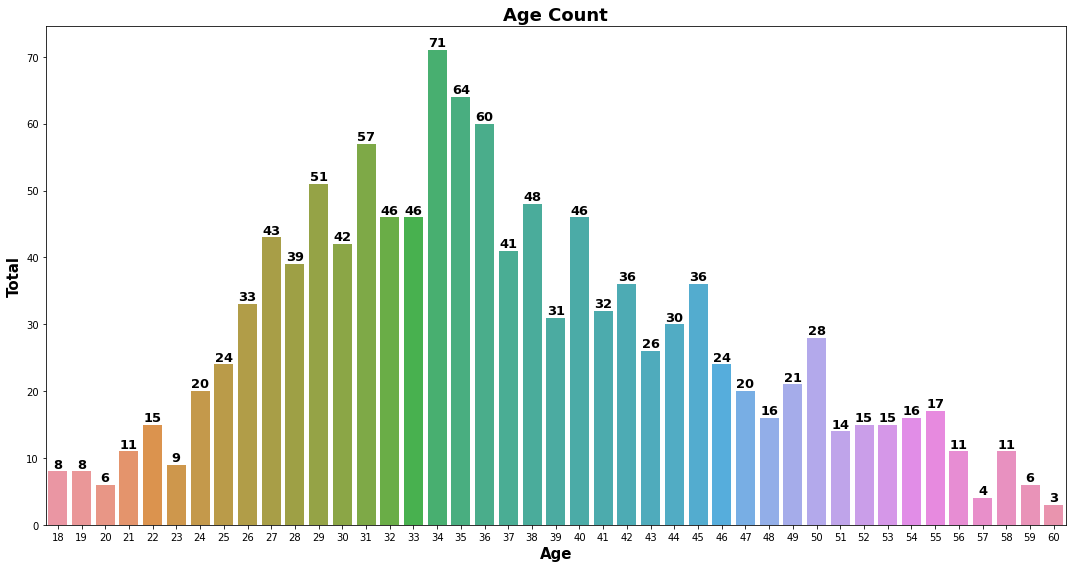

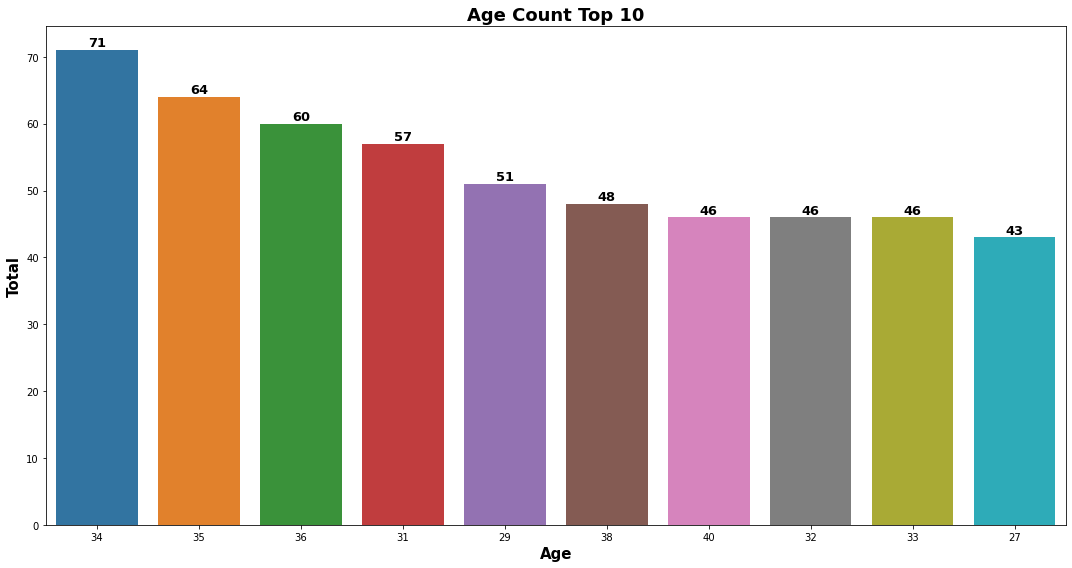

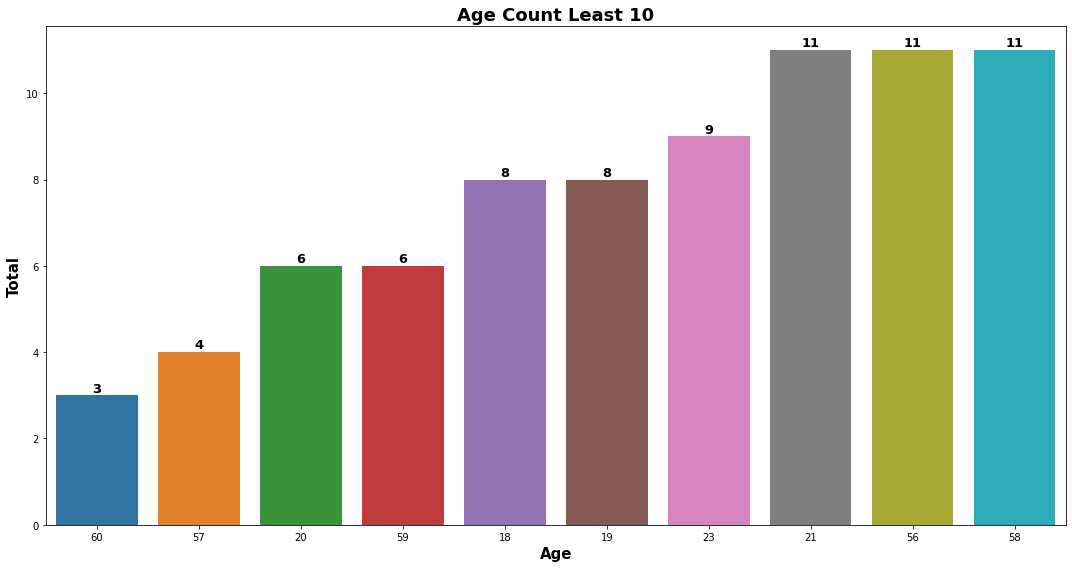

In [7]:
barplot_analysis(data_col_numeric[0])

## Distancefromhome

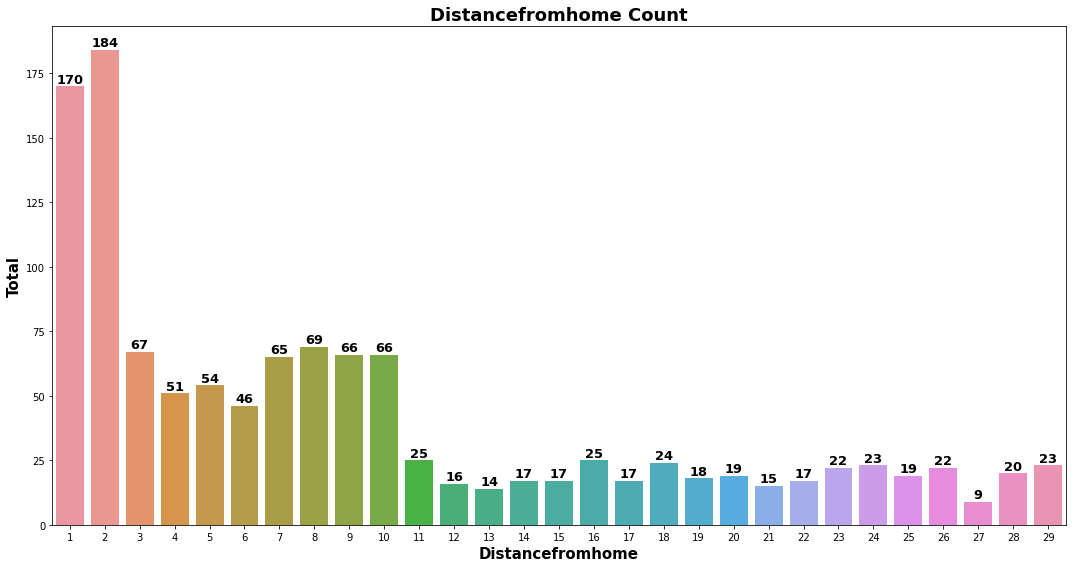

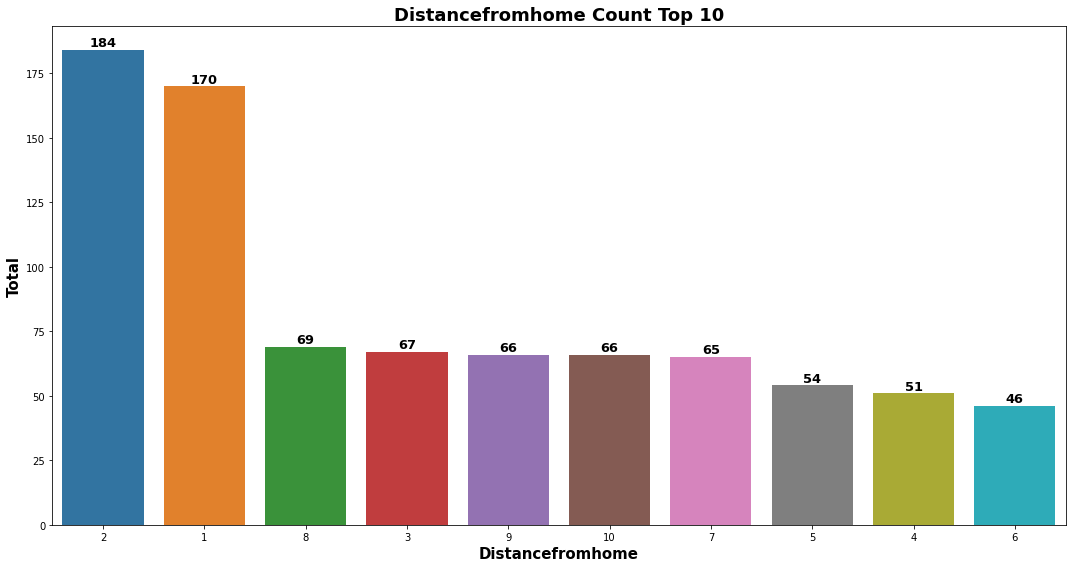

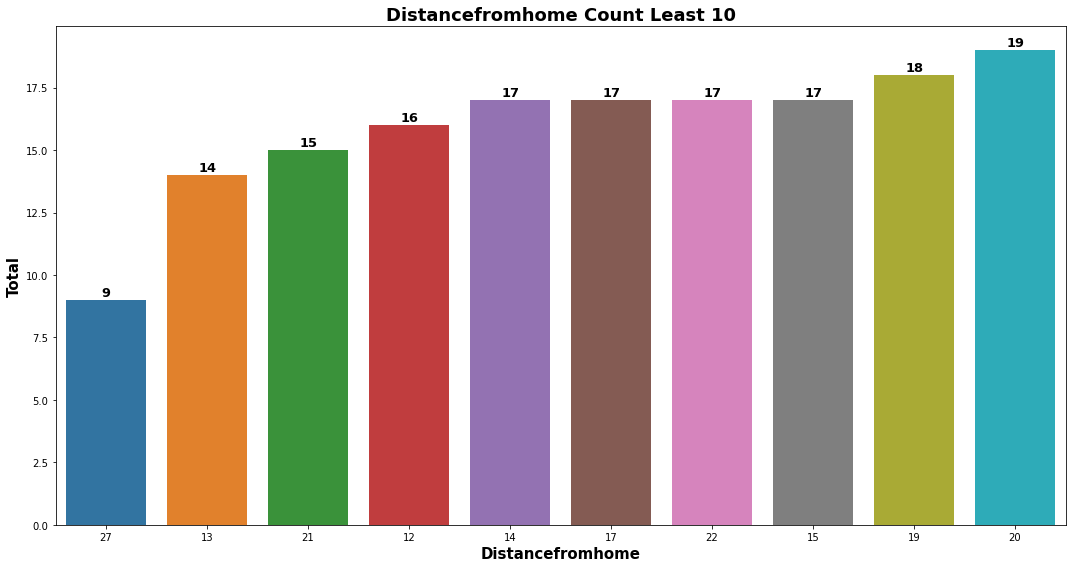

In [8]:
barplot_analysis(data_col_numeric[1])

## Empeducationlevel

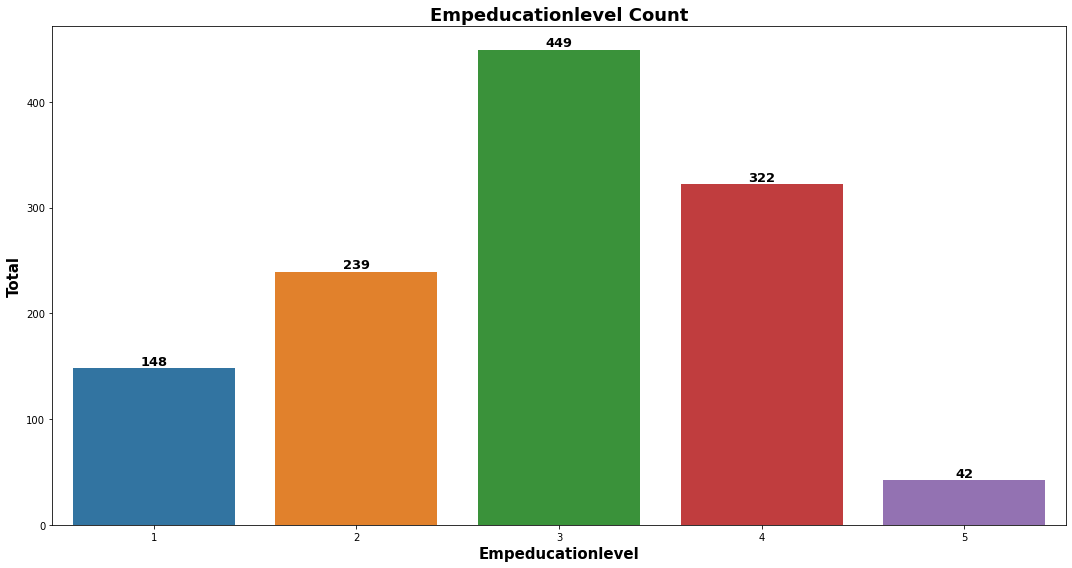

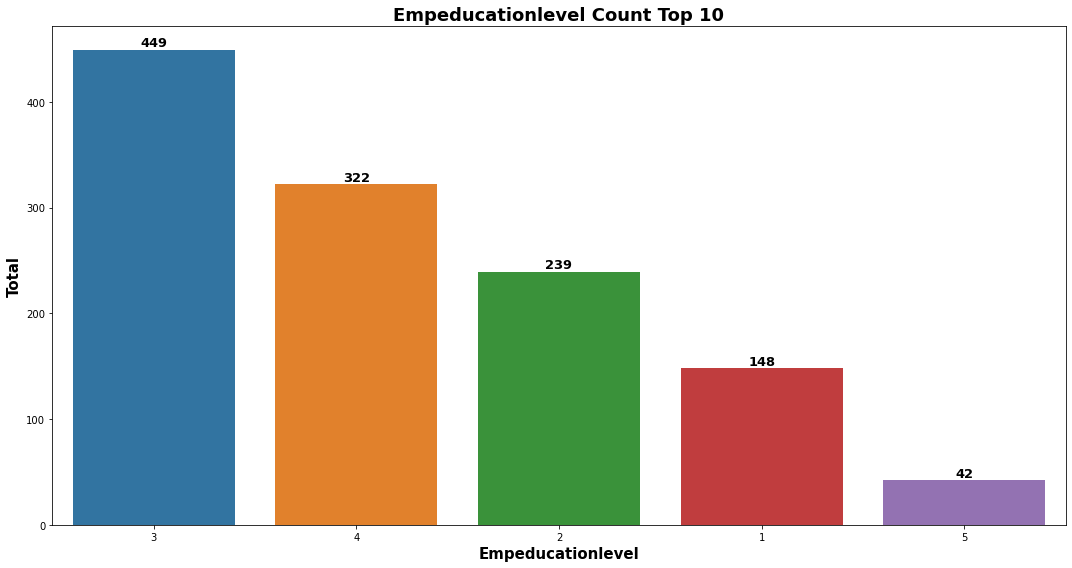

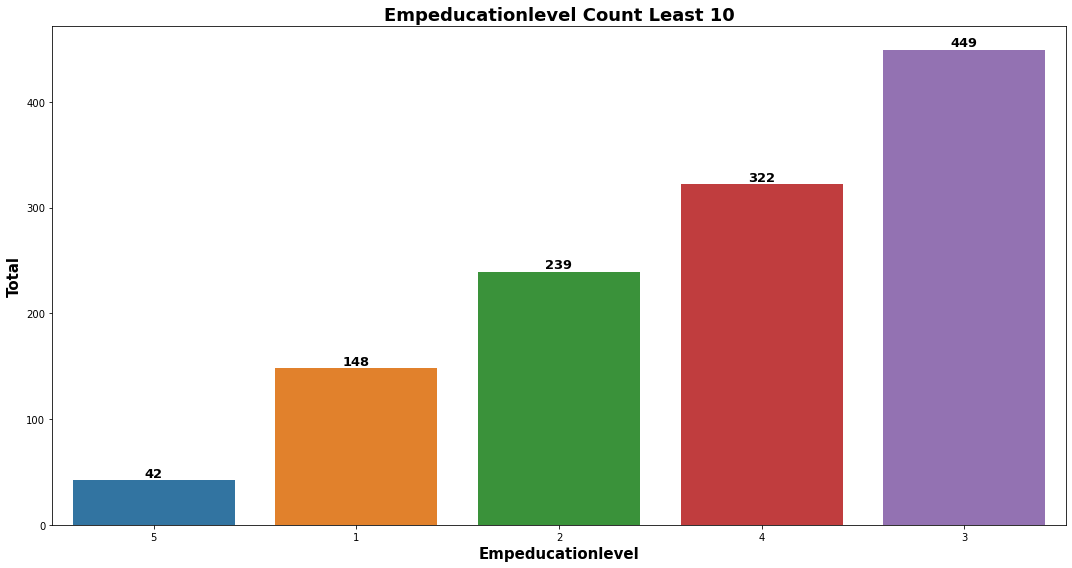

In [9]:
barplot_analysis(data_col_numeric[2])

## Empenvironmentsatisfaction

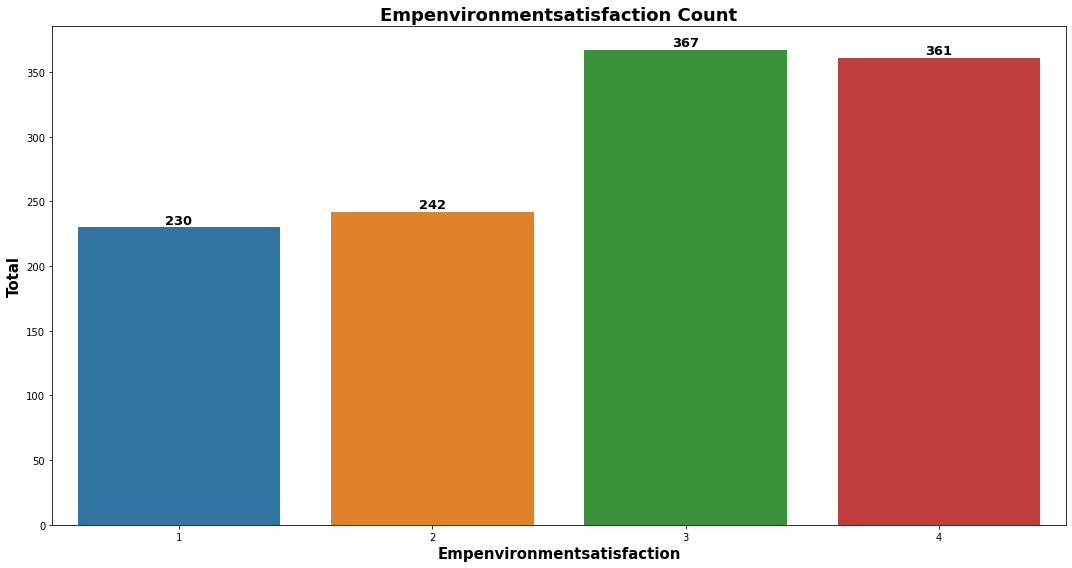

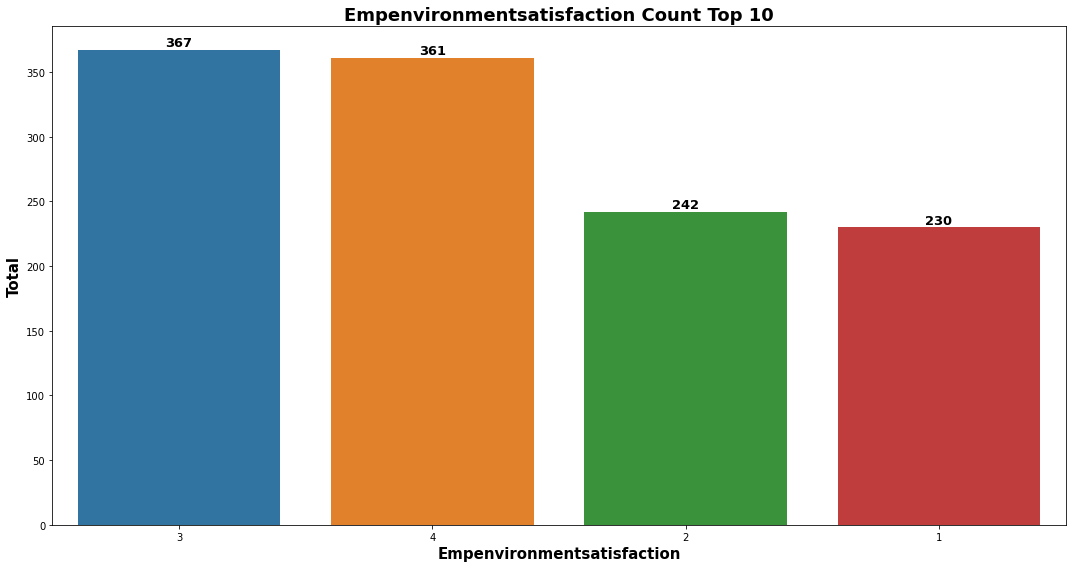

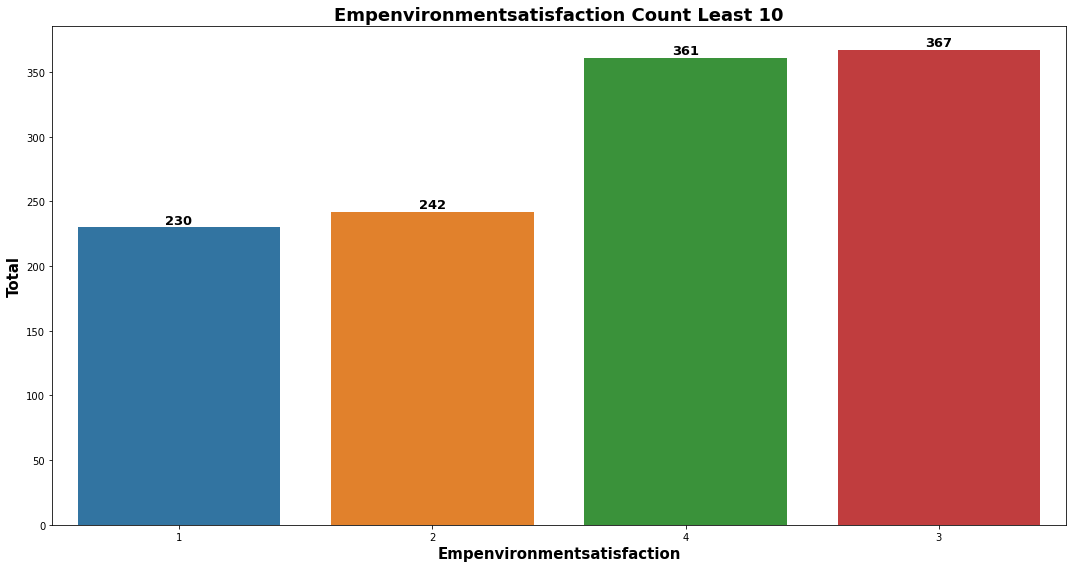

In [10]:
barplot_analysis(data_col_numeric[3])

## Emphourlyrate

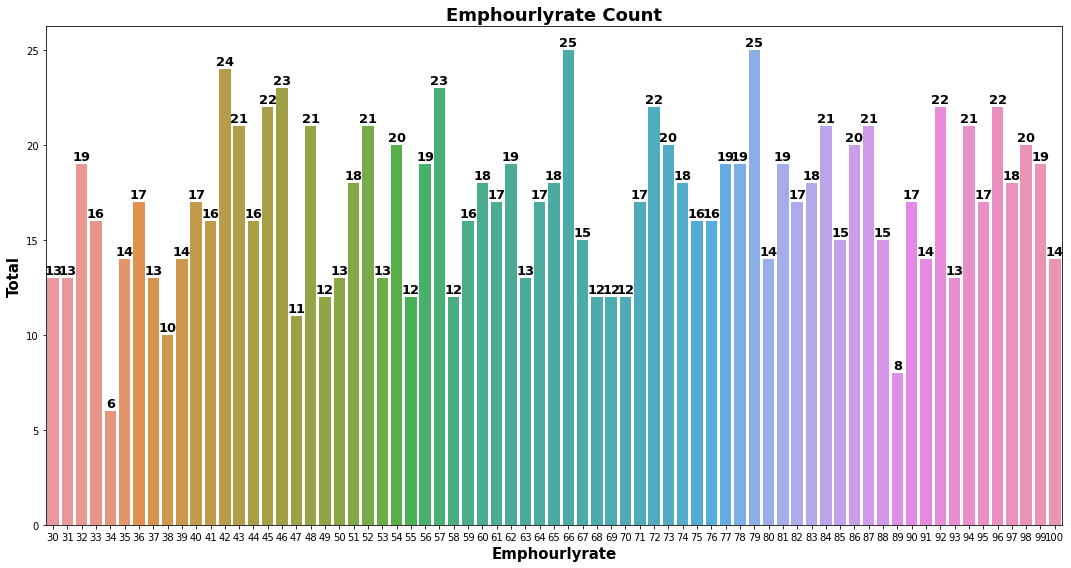

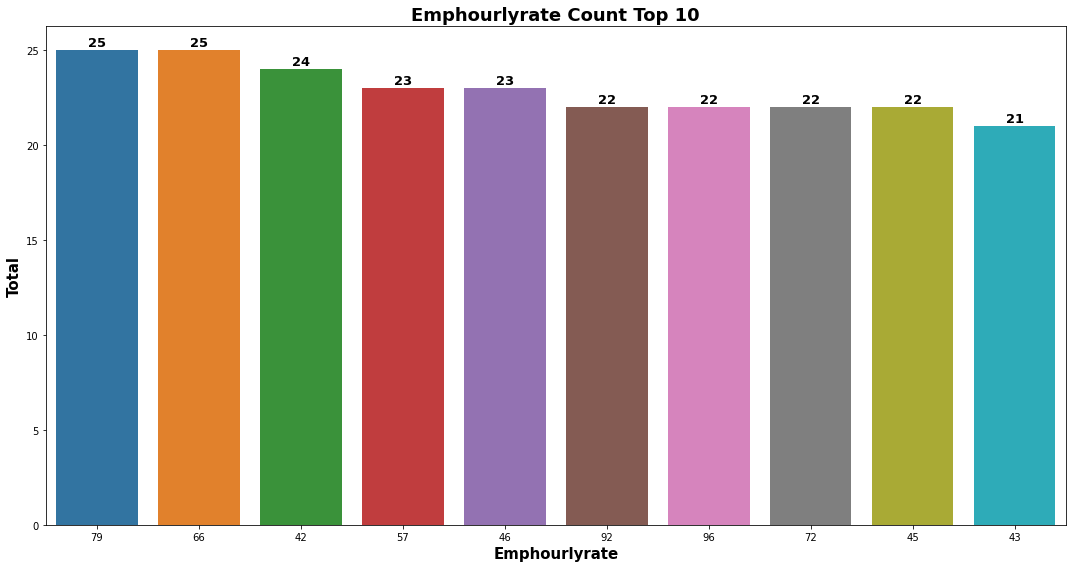

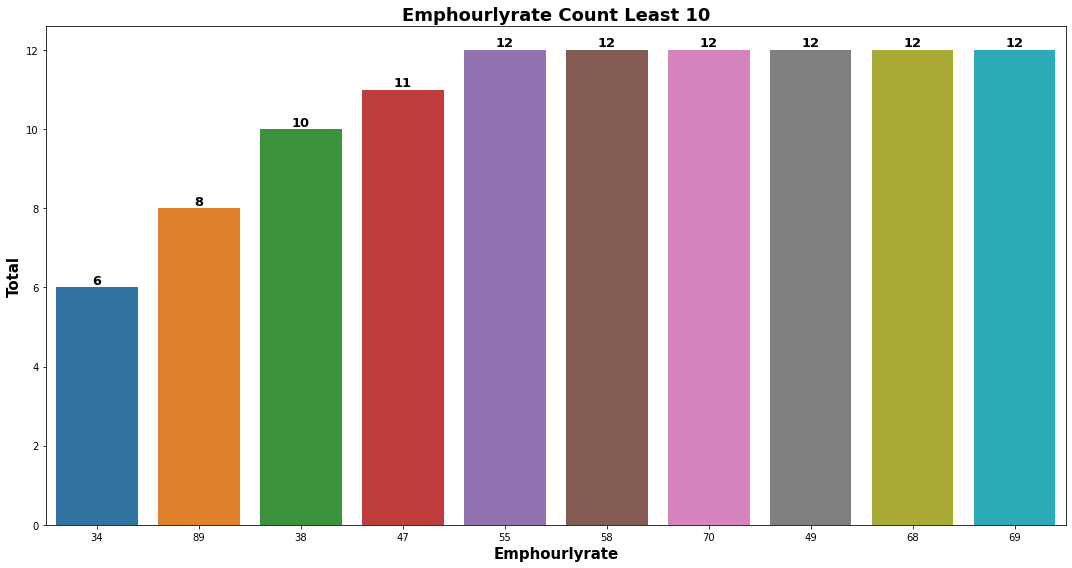

In [11]:
barplot_analysis(data_col_numeric[4])

## Empjobinvolvement

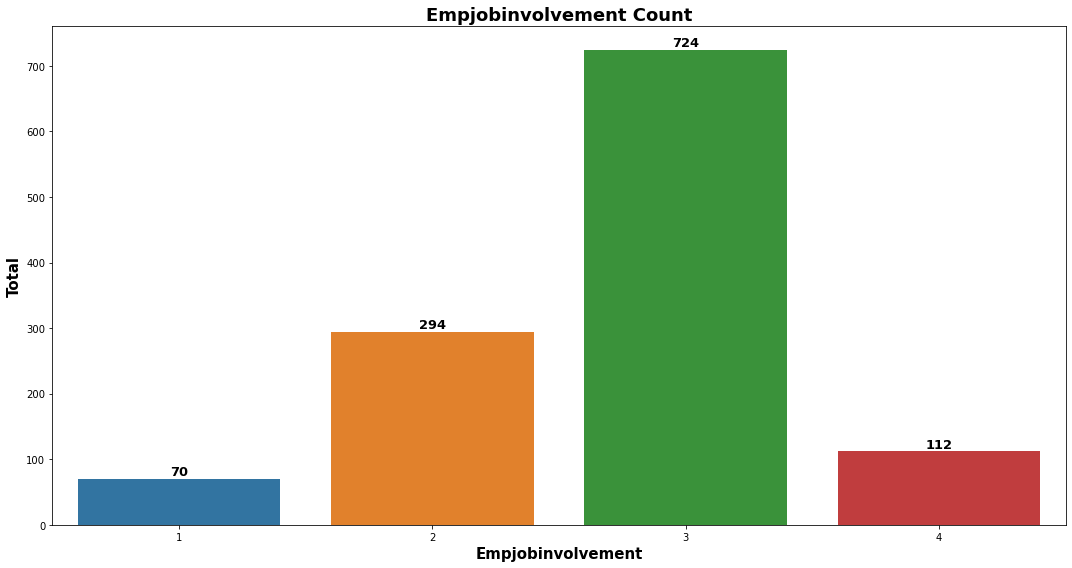

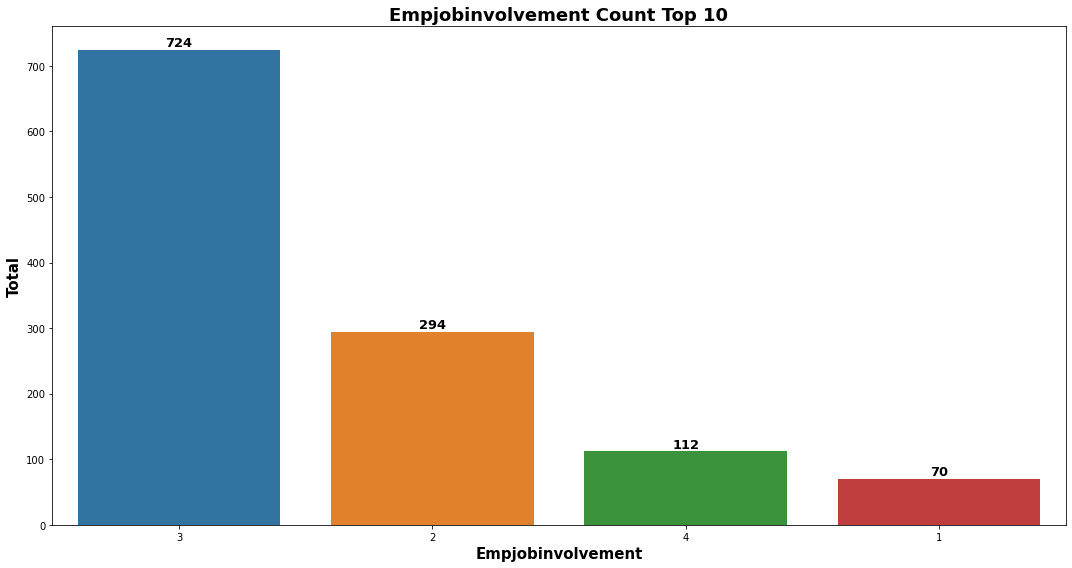

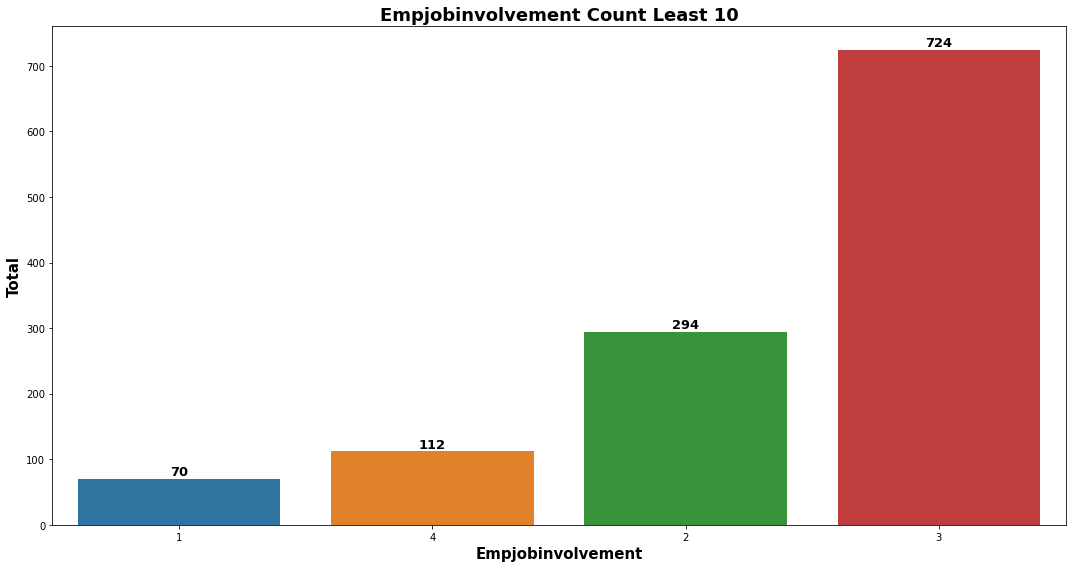

In [12]:
barplot_analysis(data_col_numeric[5])

## Empjoblevel

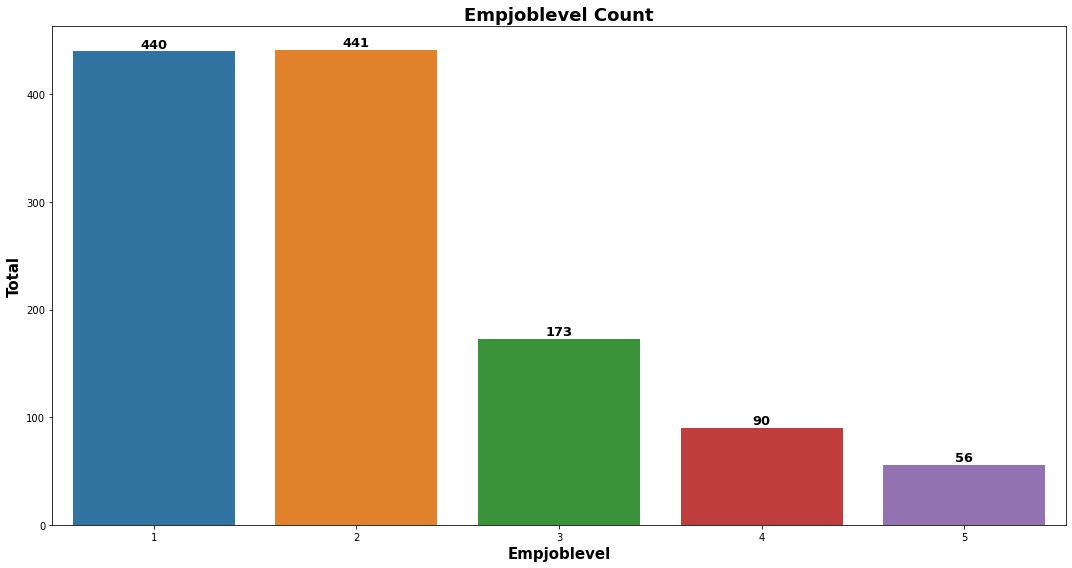

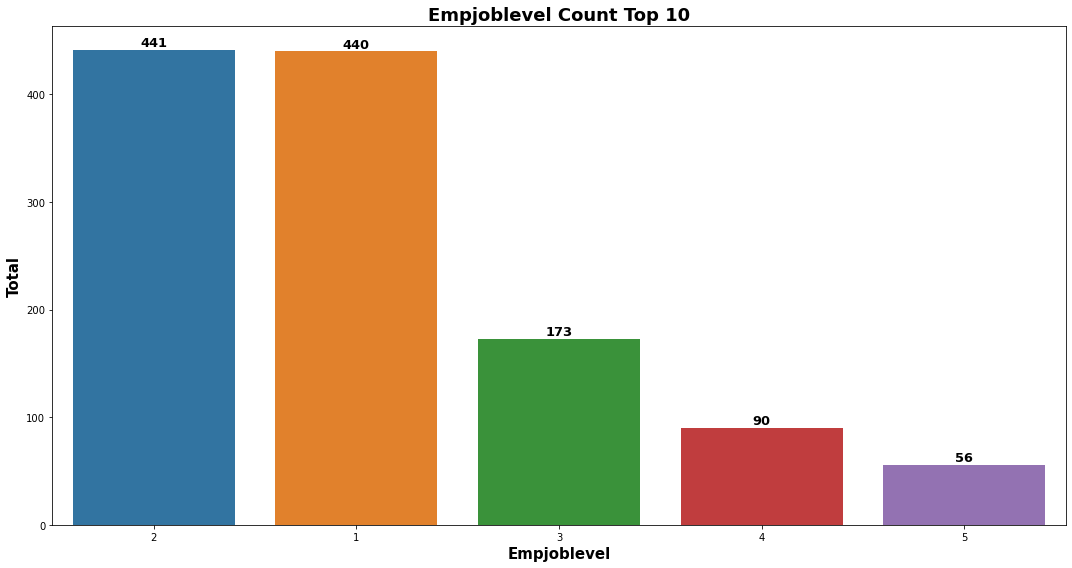

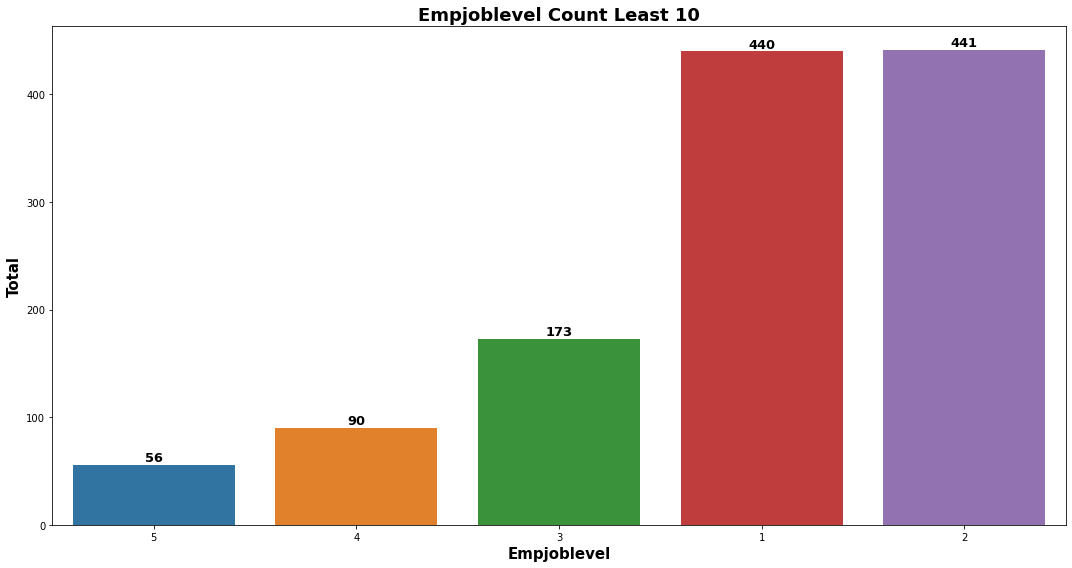

In [13]:
barplot_analysis(data_col_numeric[6])

## Empjobsatisfaction

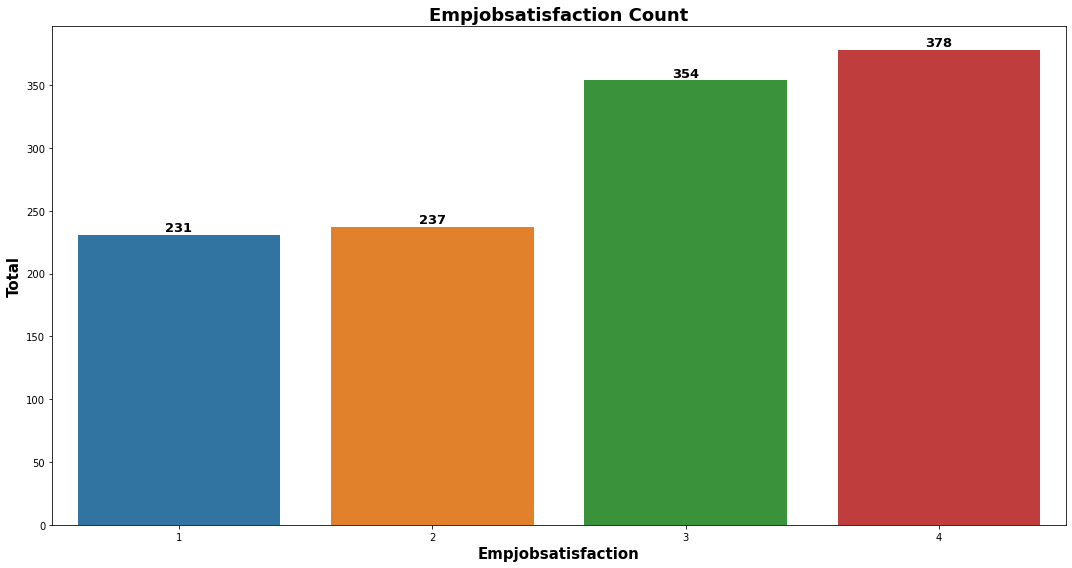

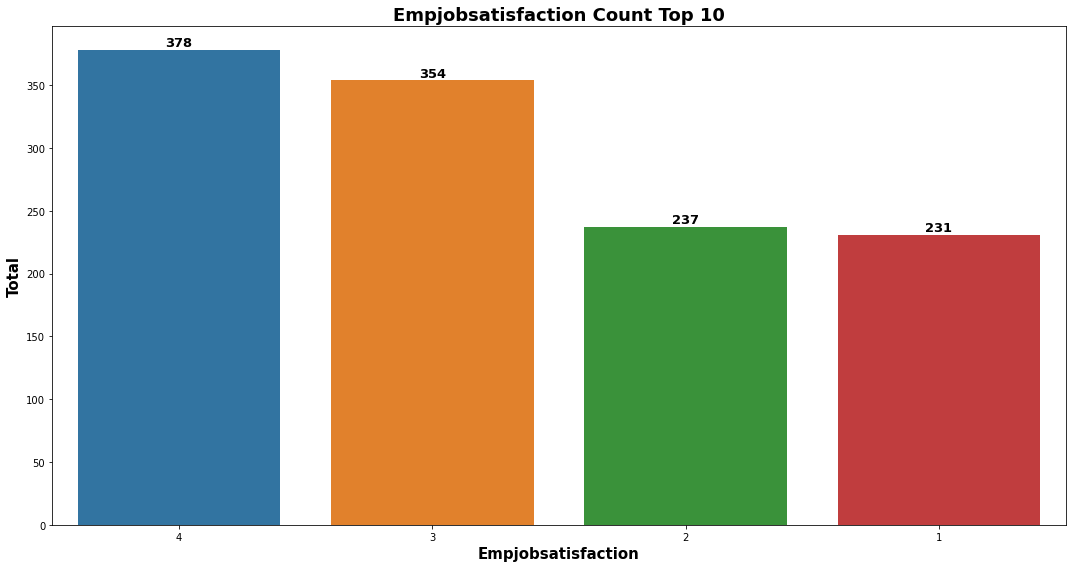

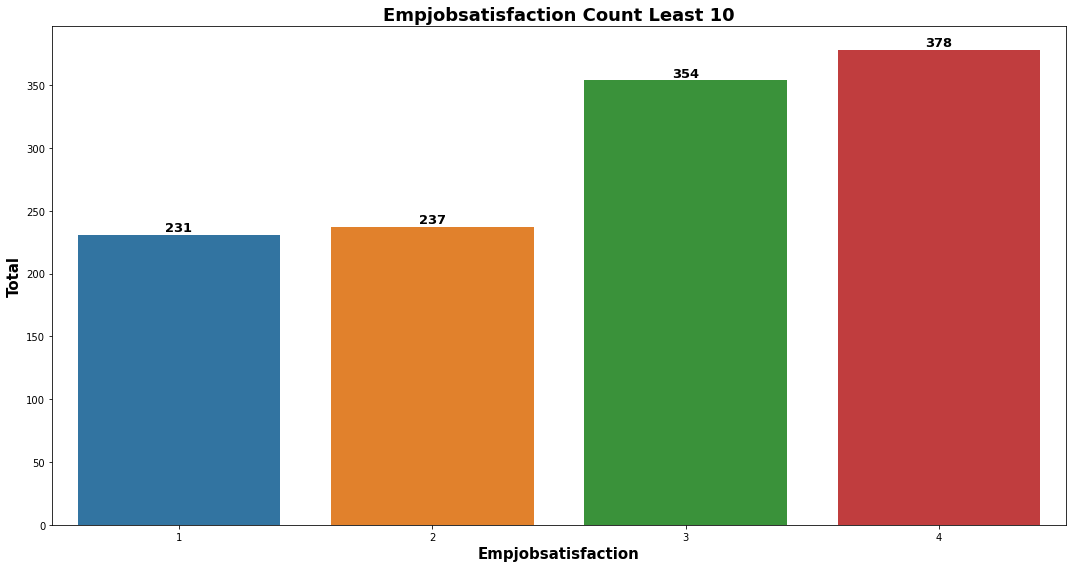

In [14]:
barplot_analysis(data_col_numeric[7])

## Numcompaniesworked

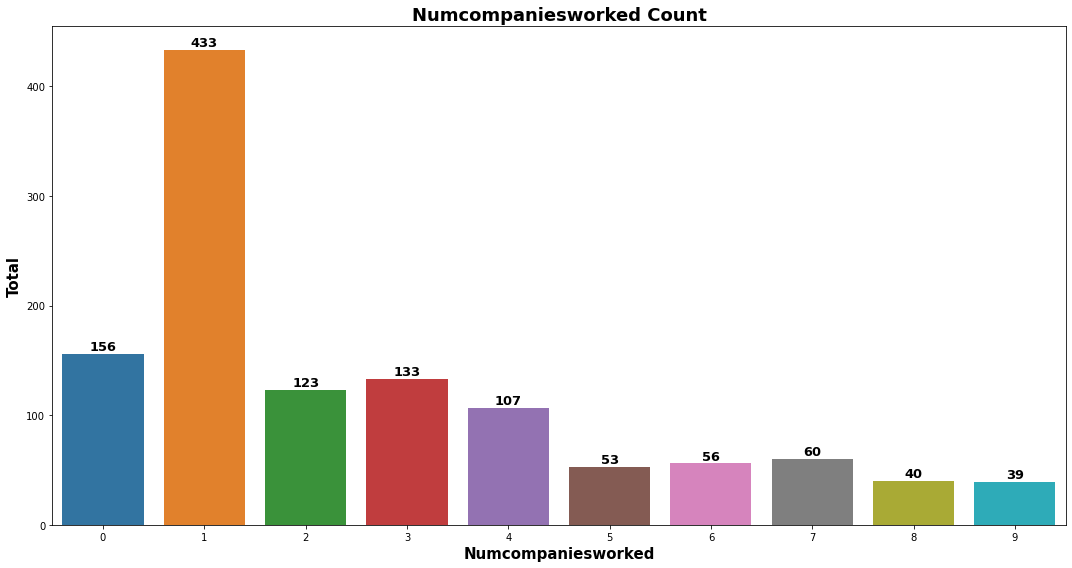

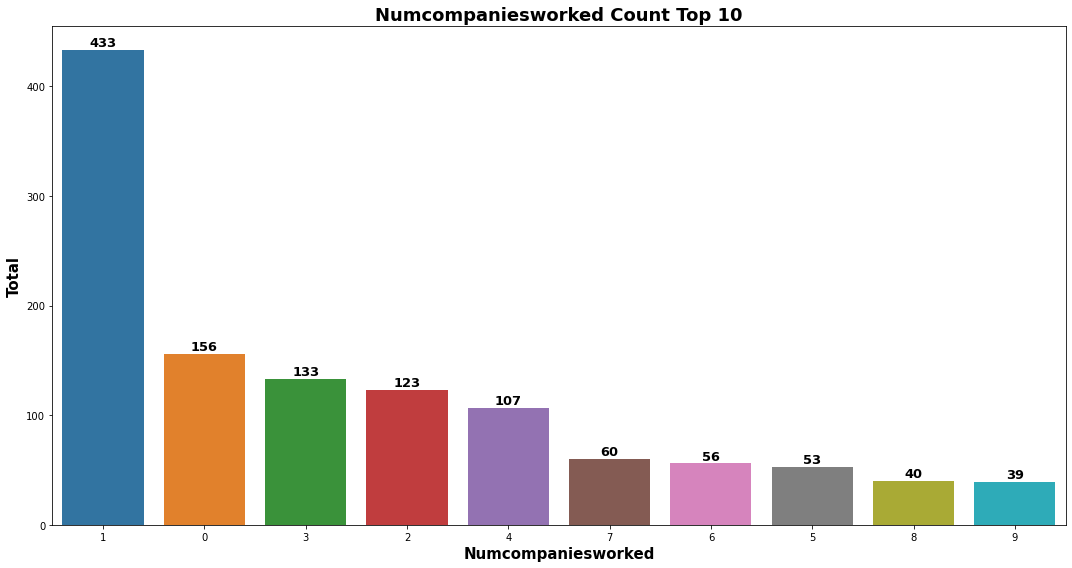

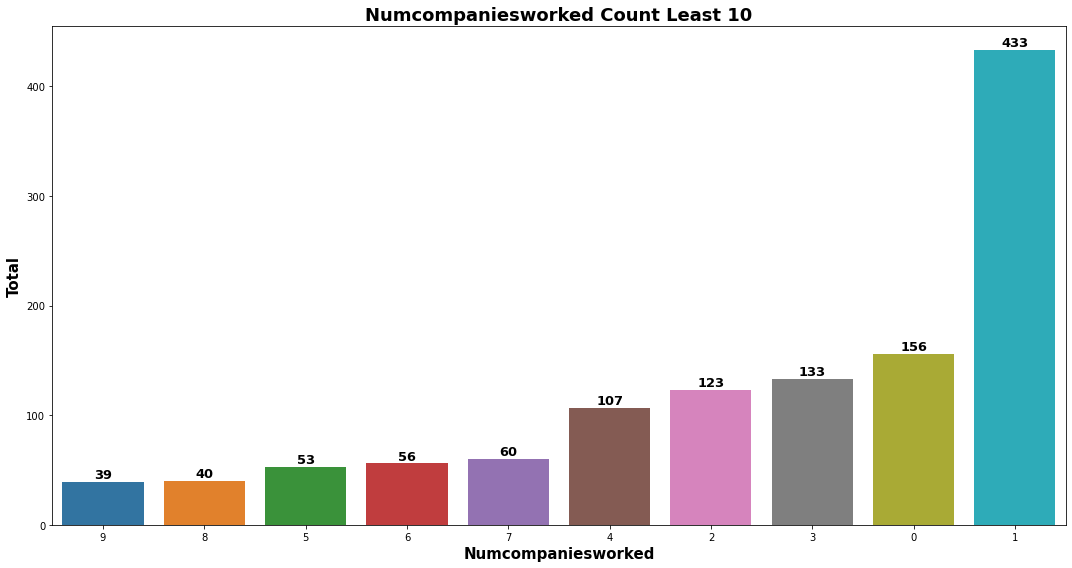

In [15]:
barplot_analysis(data_col_numeric[8])

## Emplastsalaryhikepercent

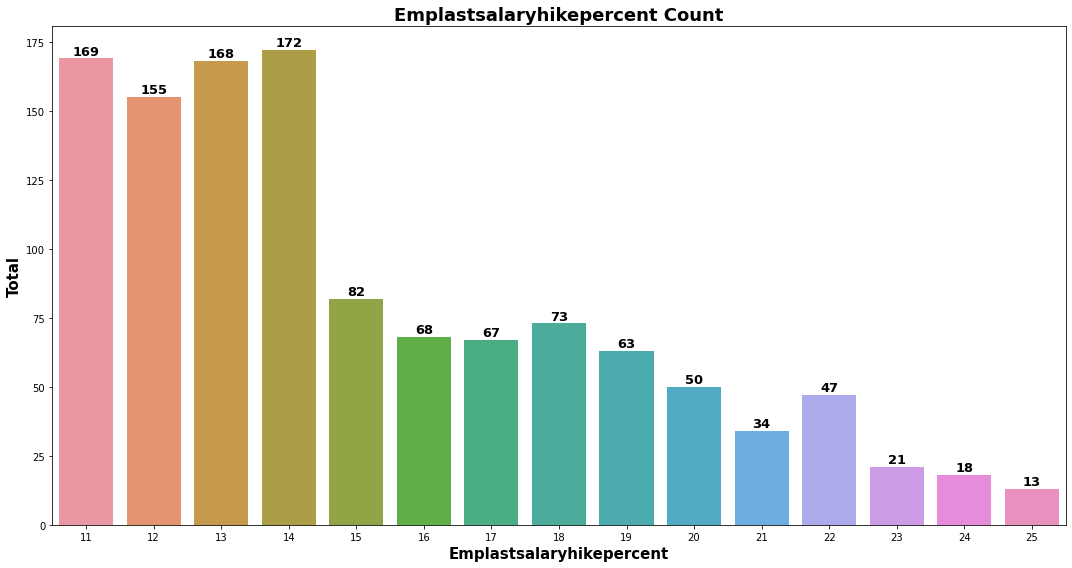

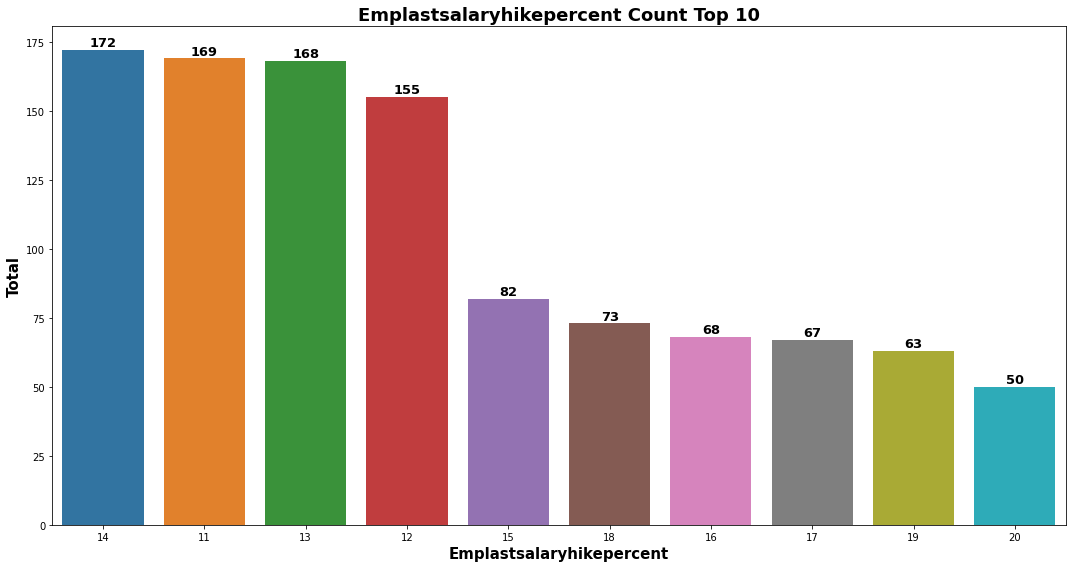

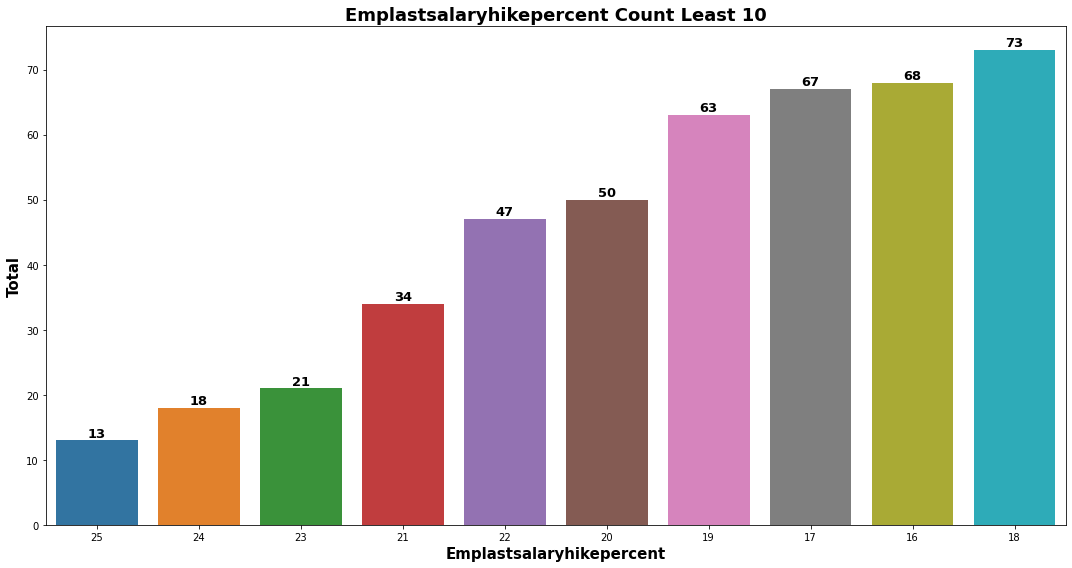

In [16]:
barplot_analysis(data_col_numeric[9])

## Emprelationshipsatisfaction

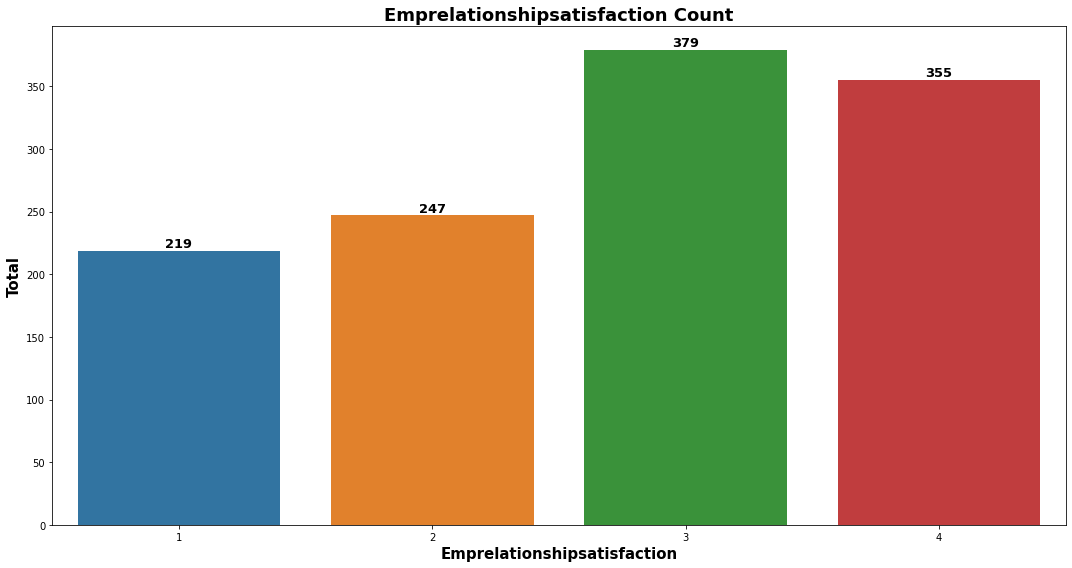

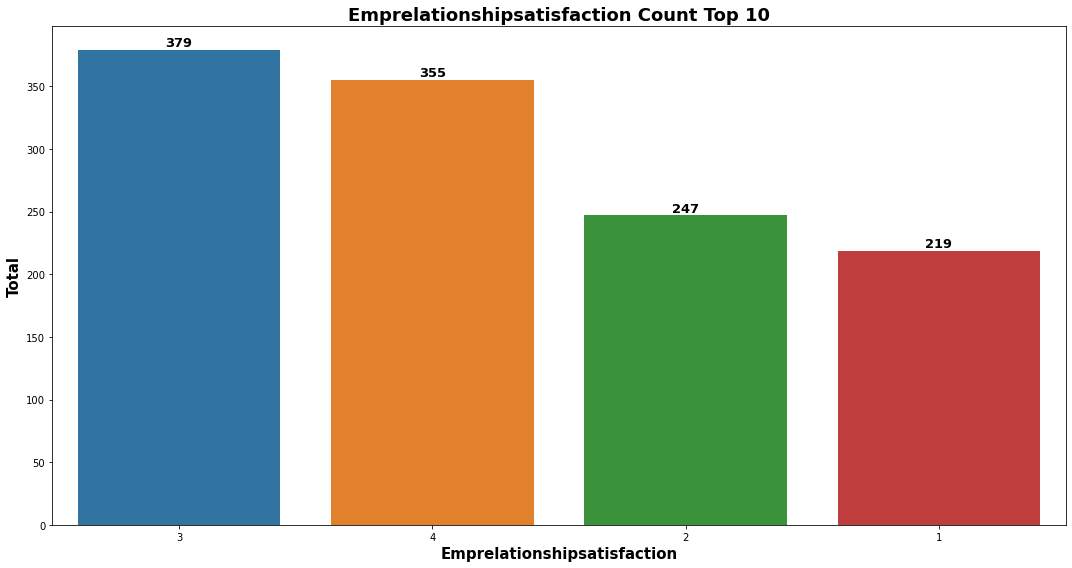

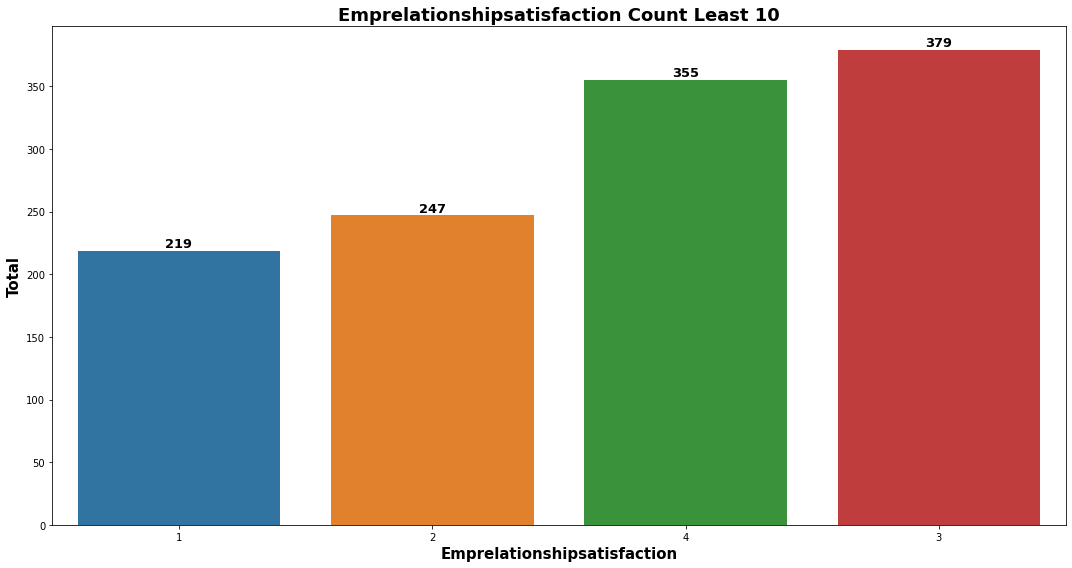

In [17]:
barplot_analysis(data_col_numeric[10])

## Totalworkexperienceinyears

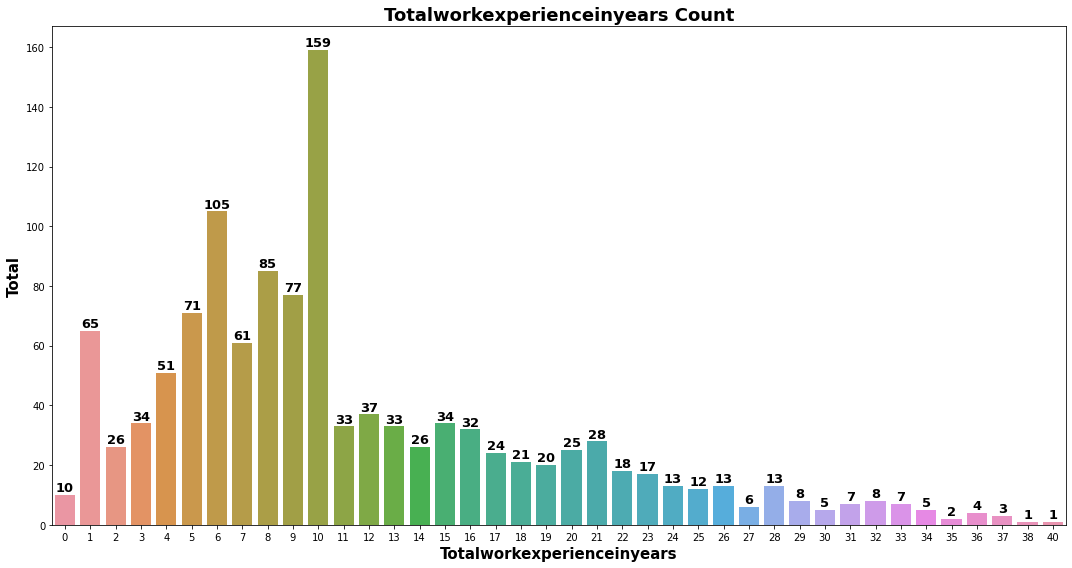

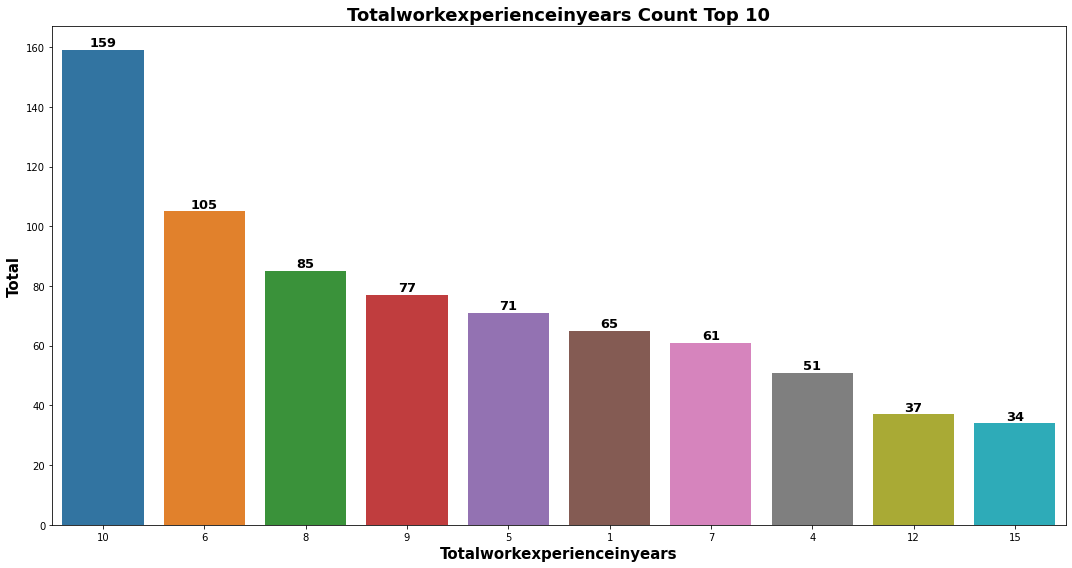

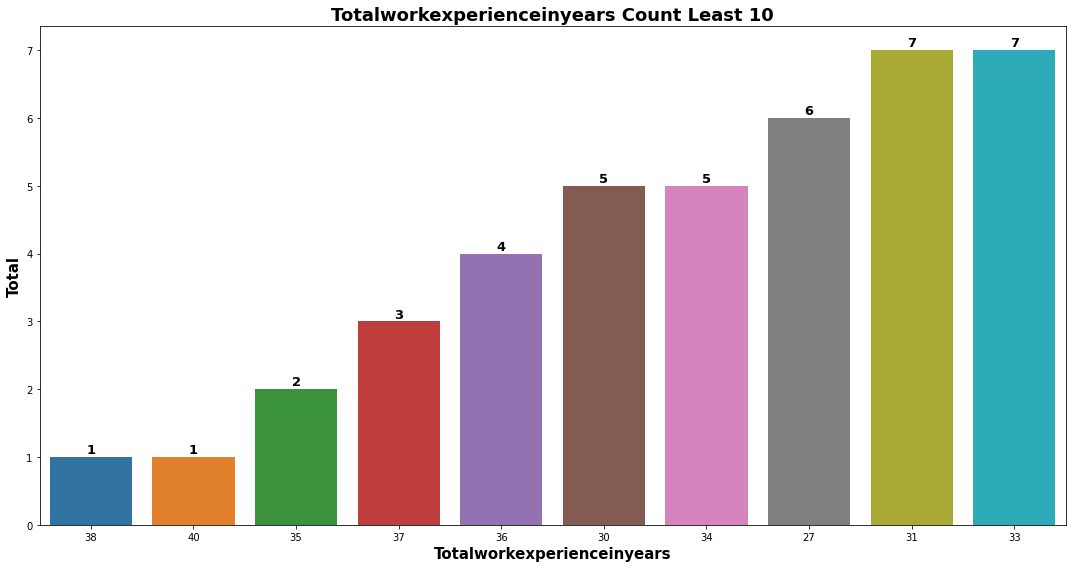

In [18]:
barplot_analysis(data_col_numeric[11])

## Trainingtimeslastyear

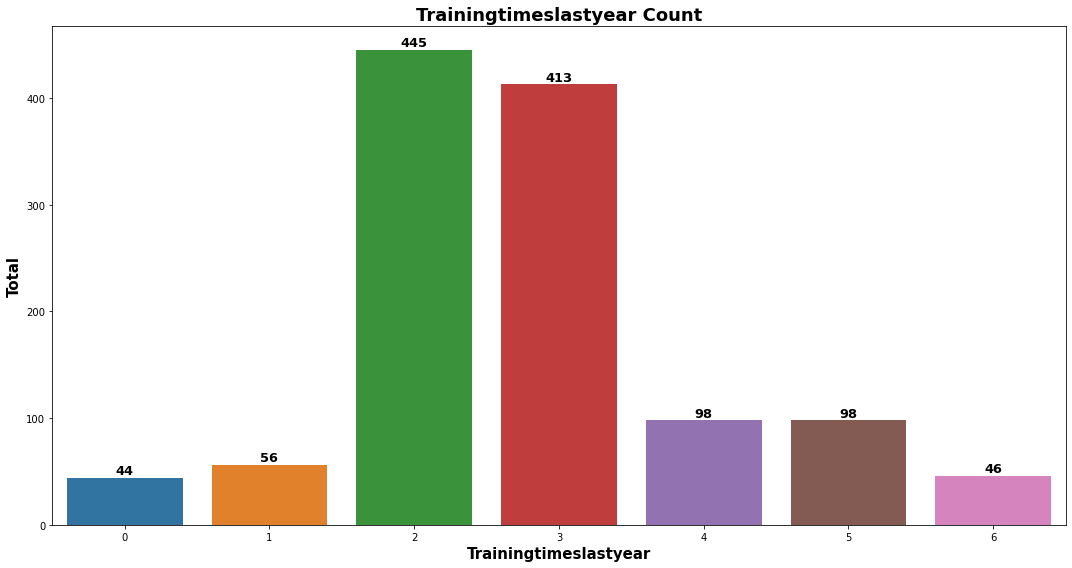

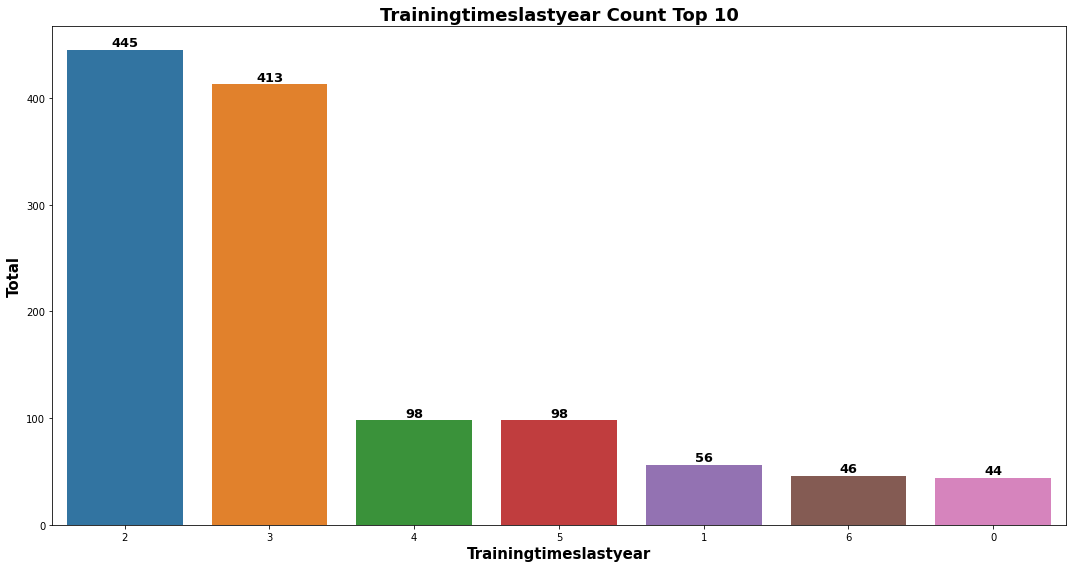

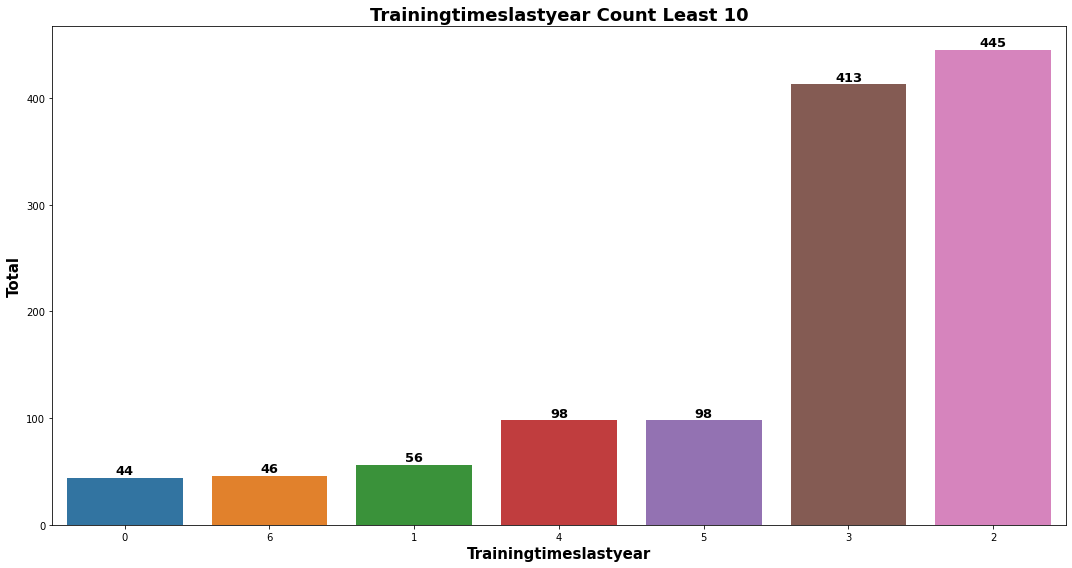

In [19]:
barplot_analysis(data_col_numeric[12])

## Empworklifebalance

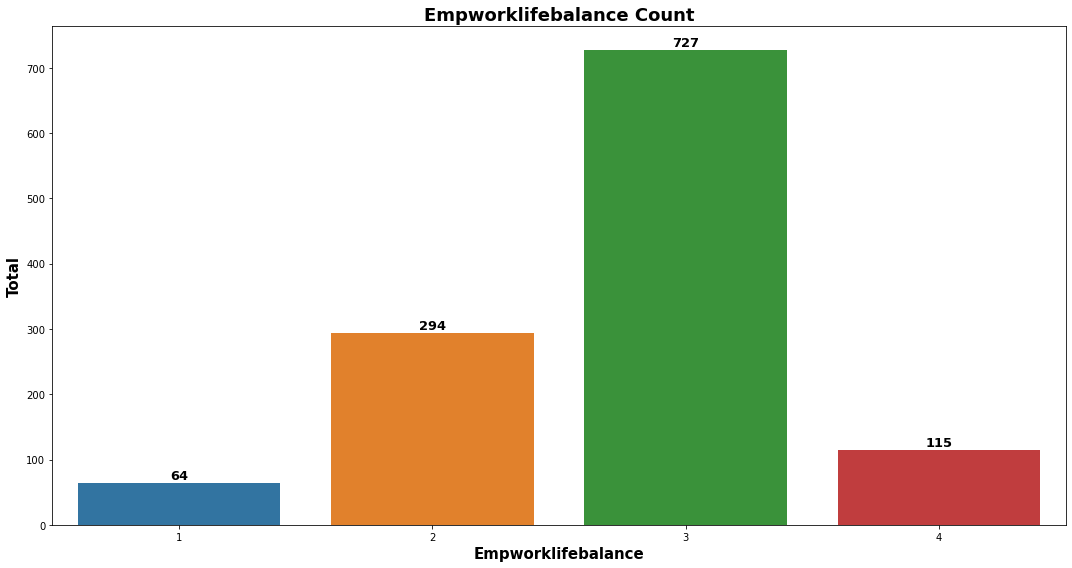

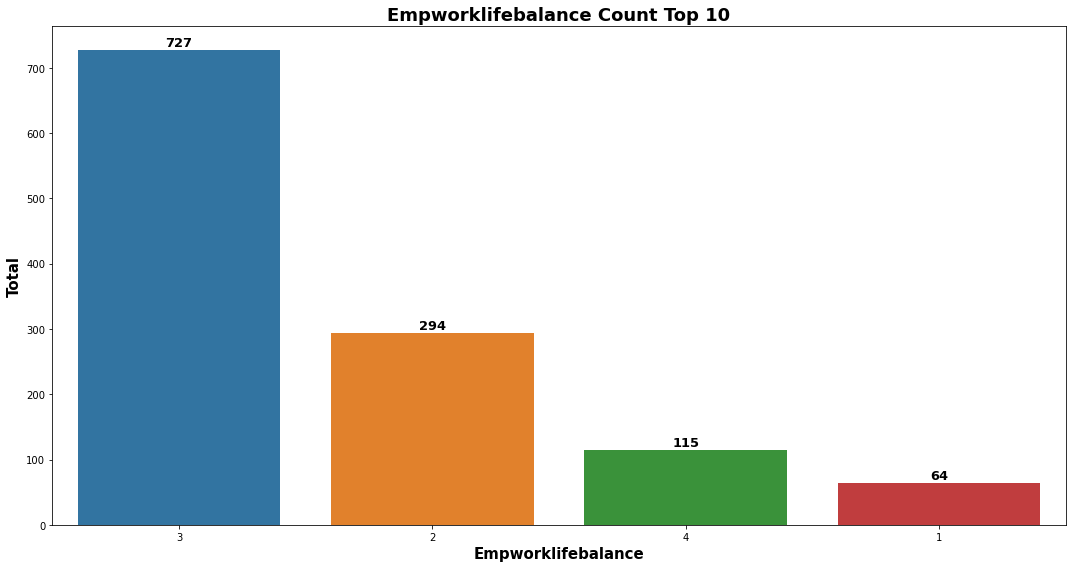

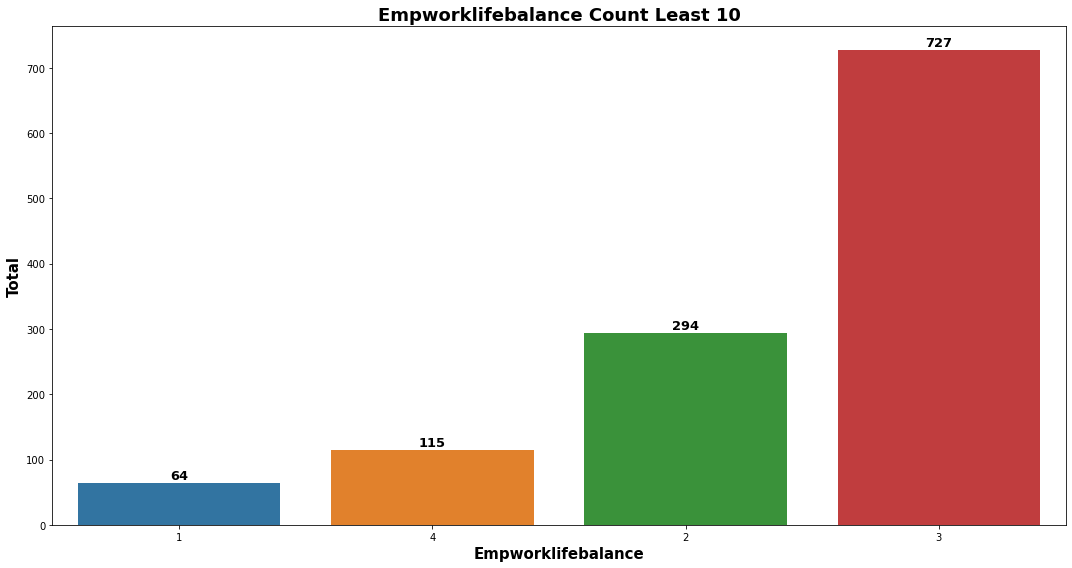

In [20]:
barplot_analysis(data_col_numeric[13])

## Experienceyearsatthiscompany

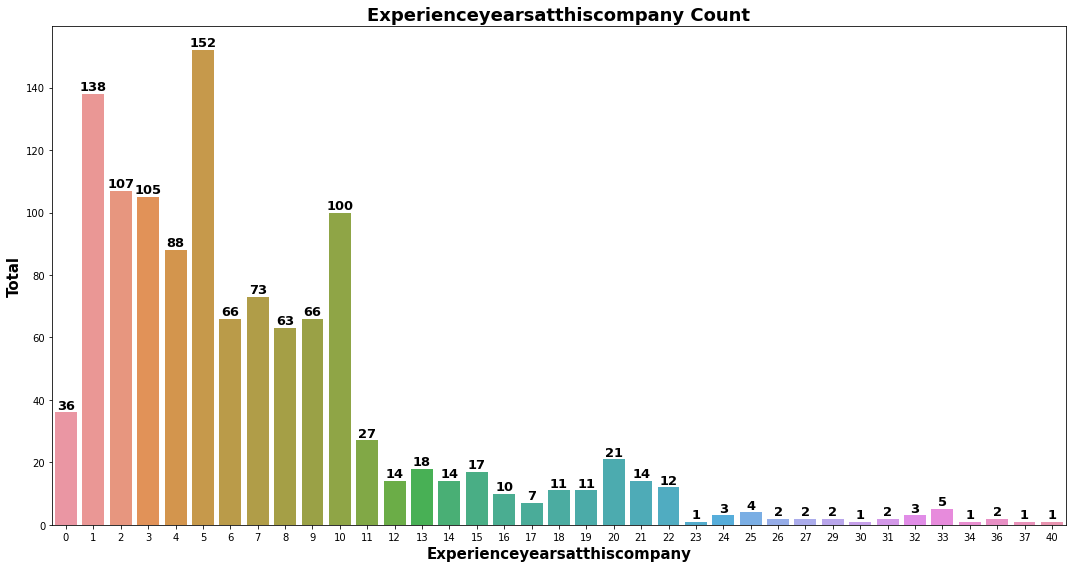

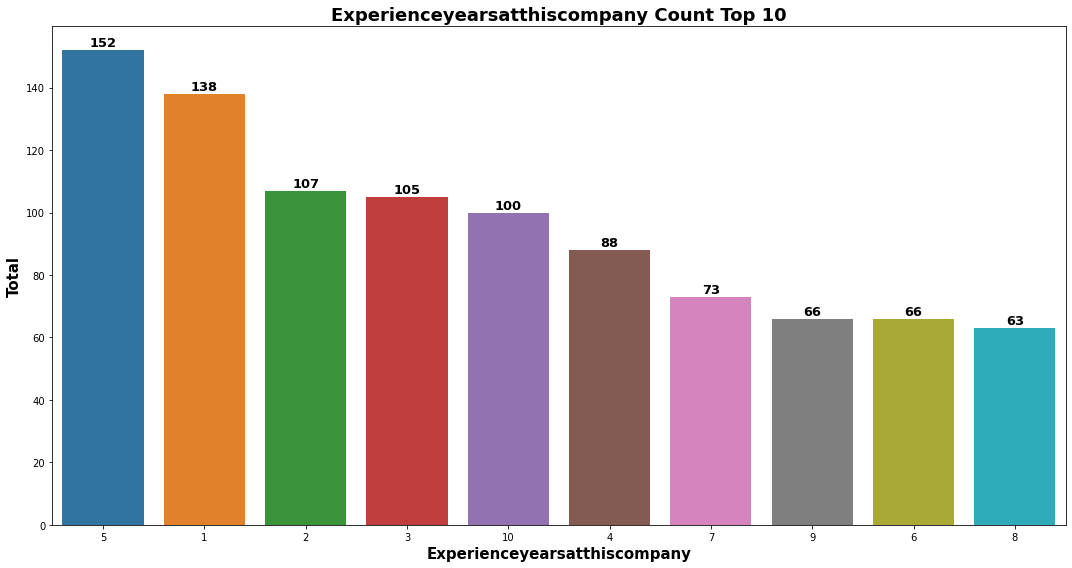

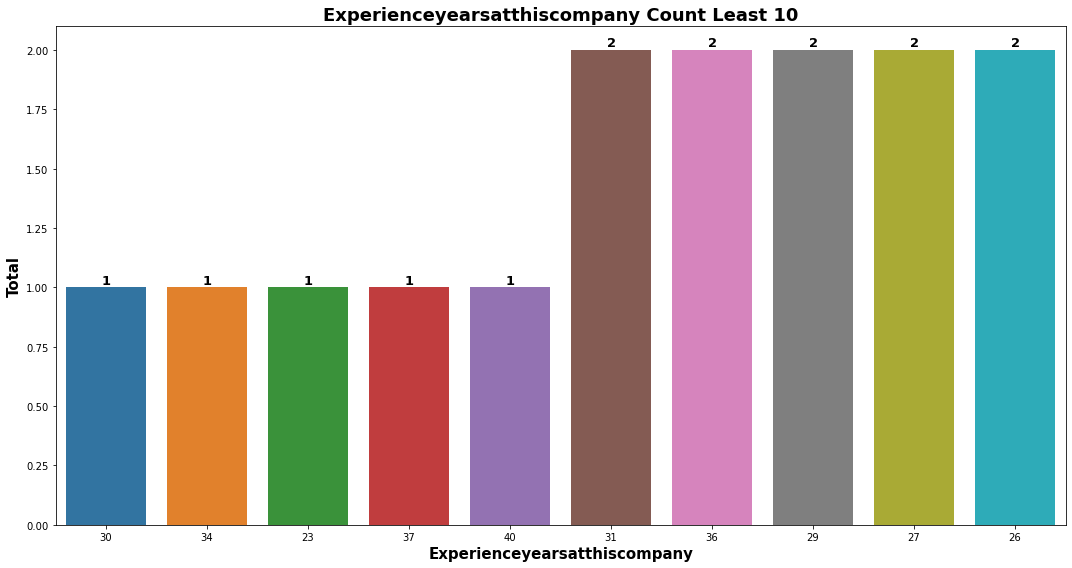

In [21]:
barplot_analysis(data_col_numeric[14])

## Experienceyearsincurrentrole

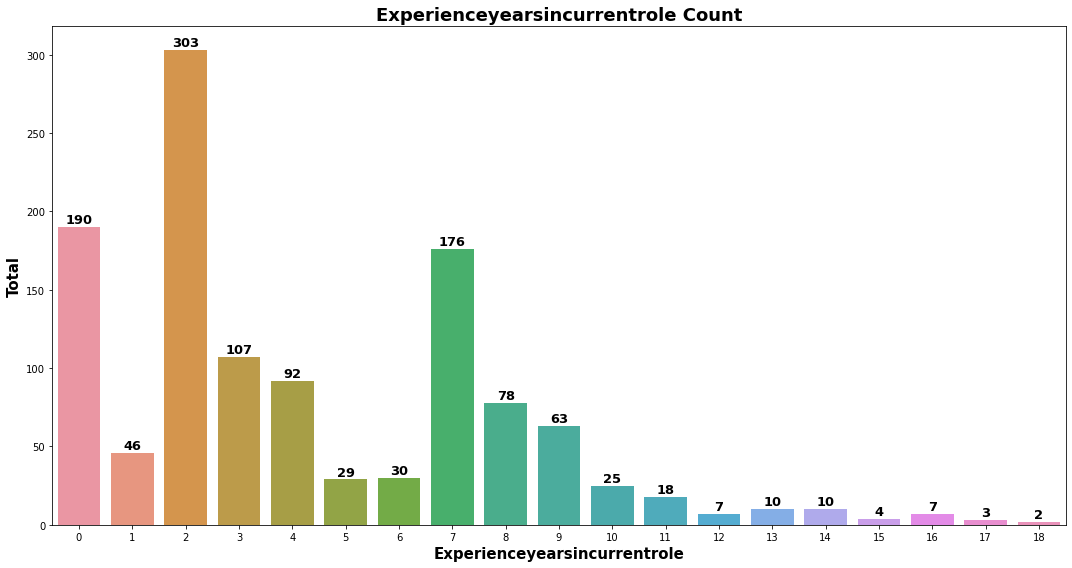

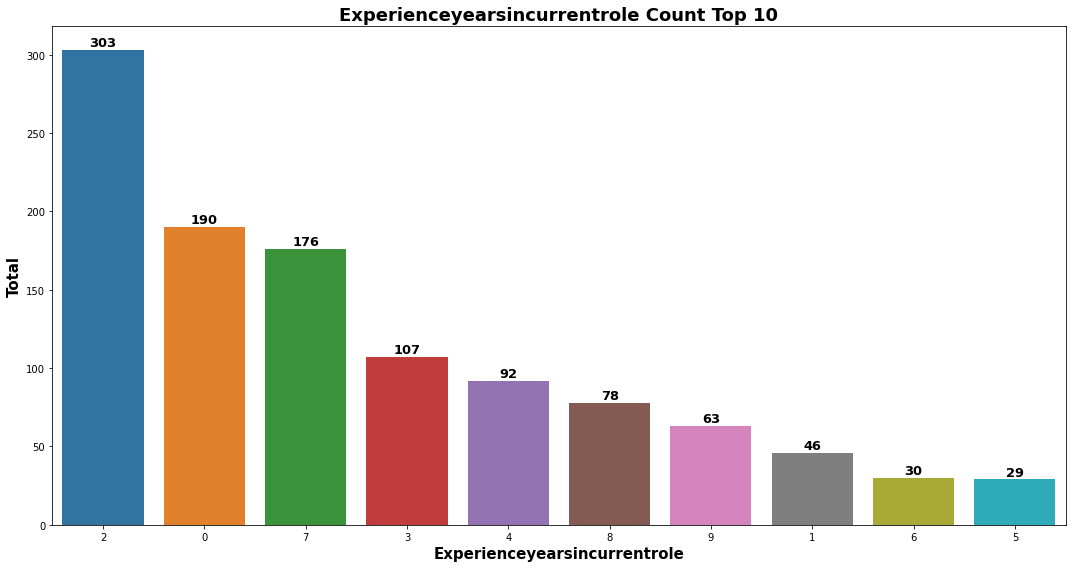

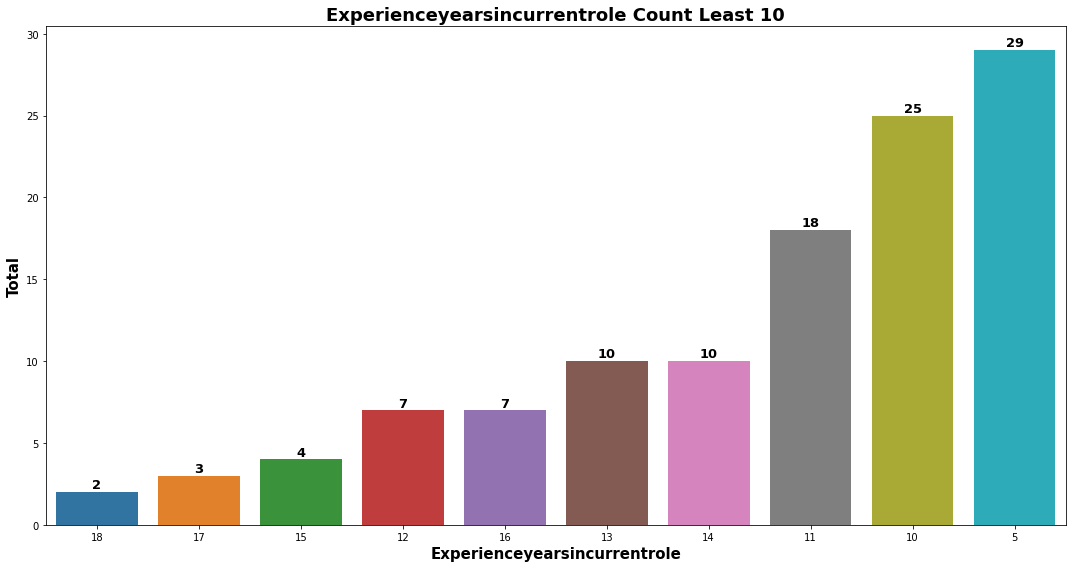

In [22]:
barplot_analysis(data_col_numeric[15])

## Yearssincelastpromotion

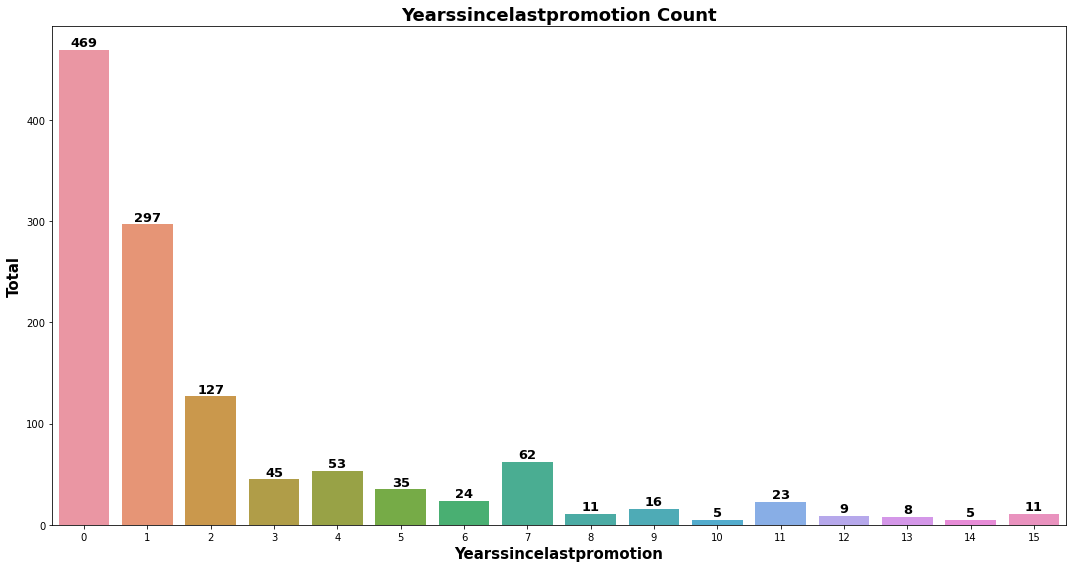

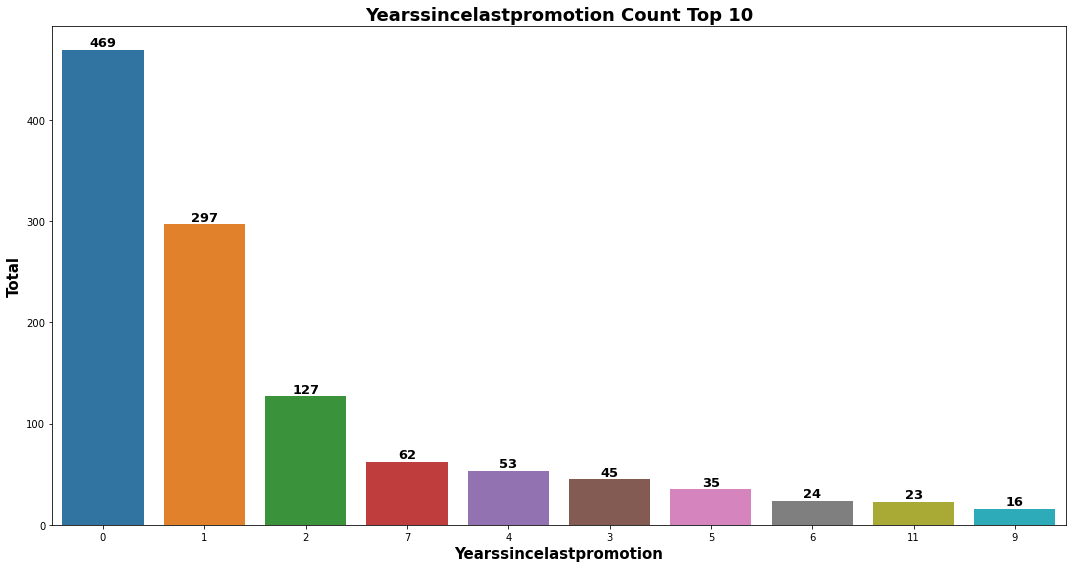

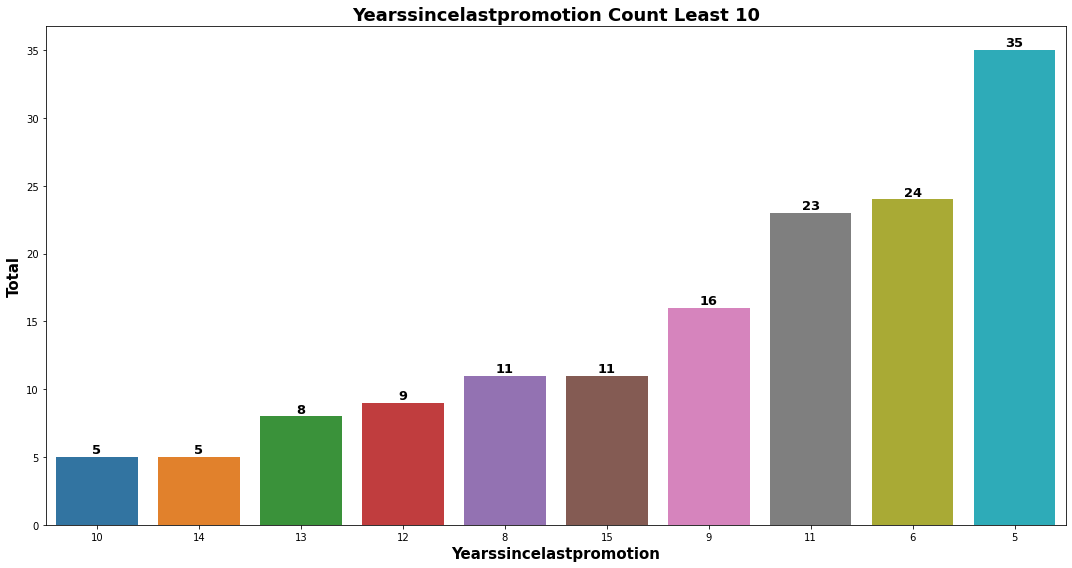

In [23]:
barplot_analysis(data_col_numeric[16])

## Yearswithcurrmanager

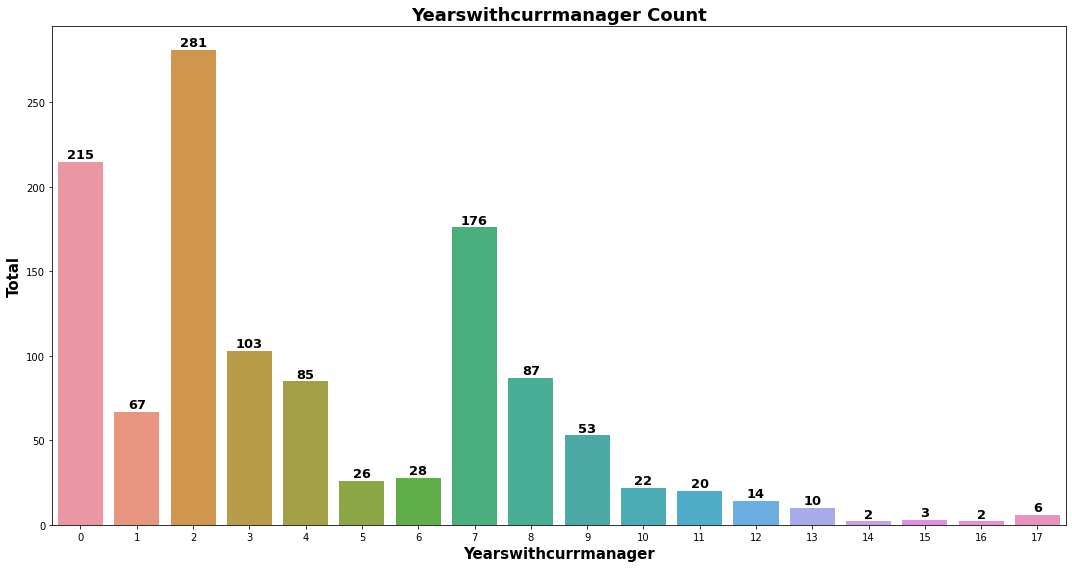

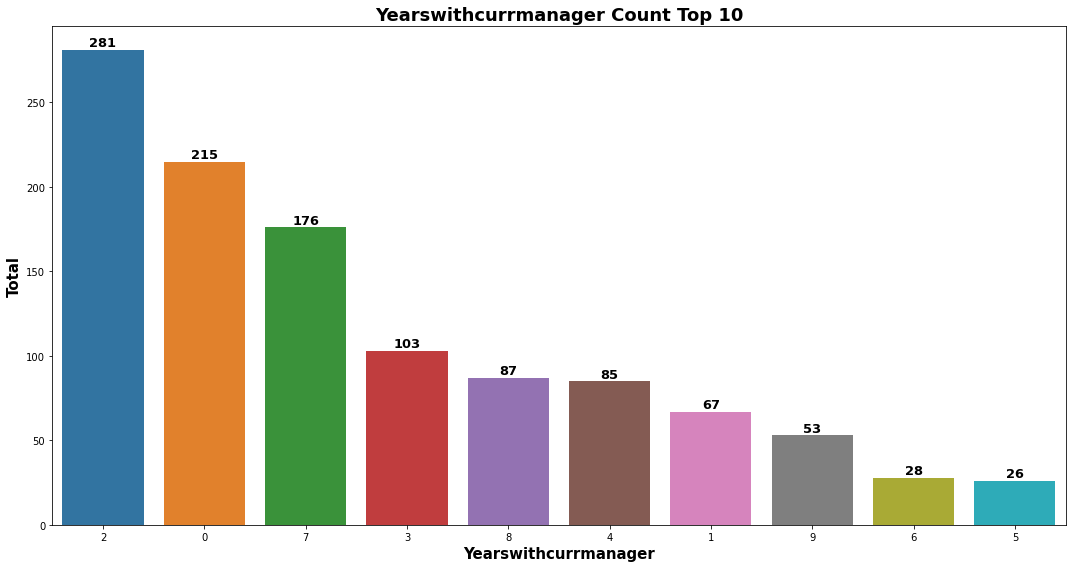

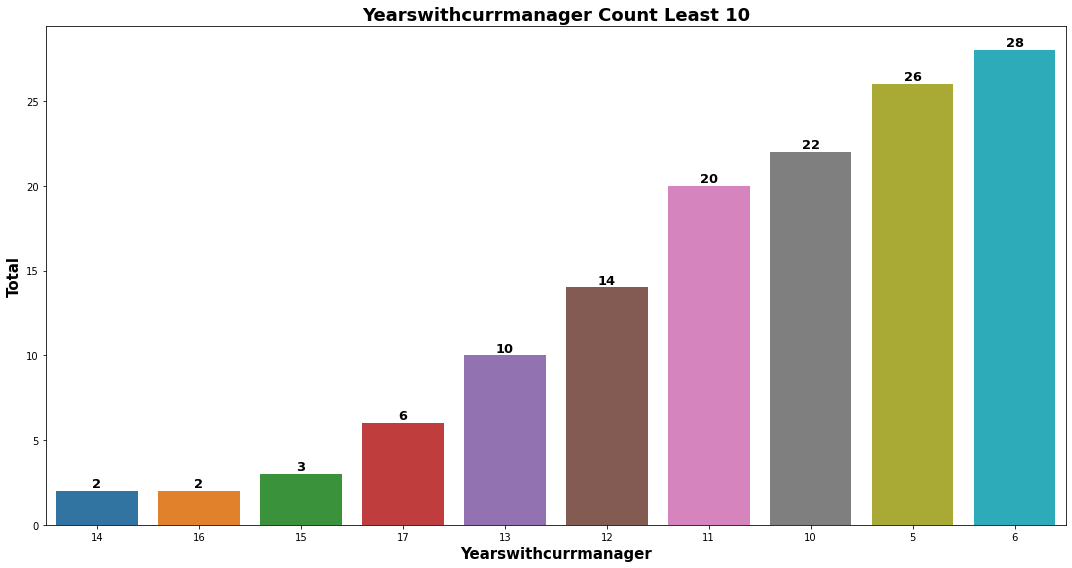

In [24]:
barplot_analysis(data_col_numeric[17])

## Performancerating

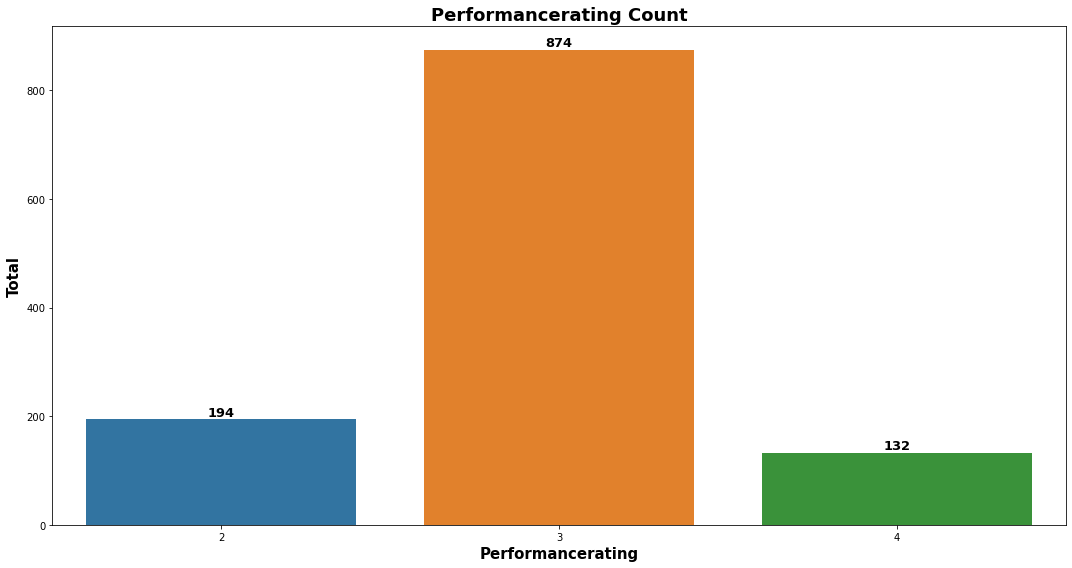

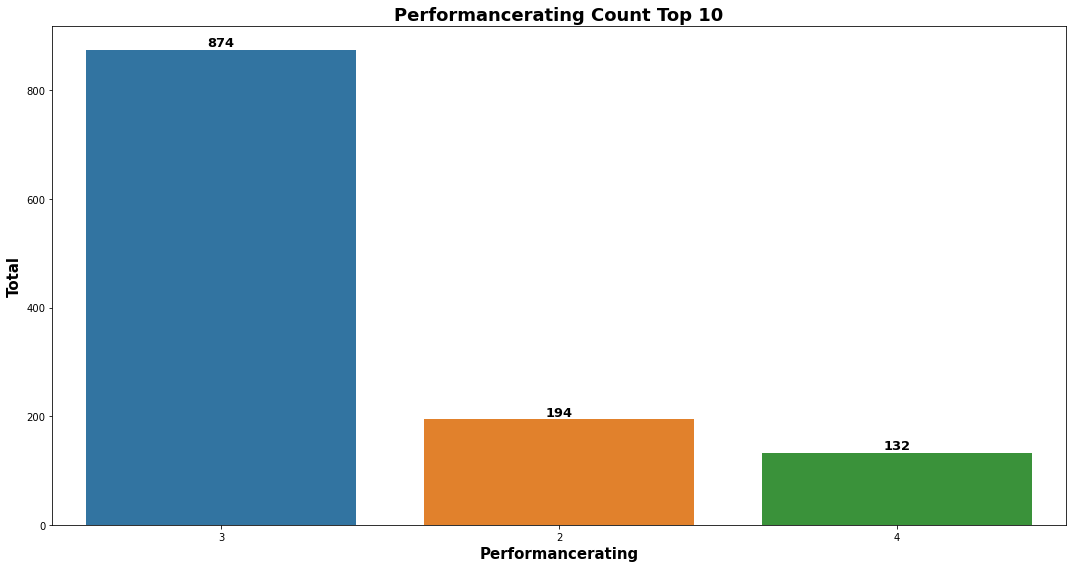

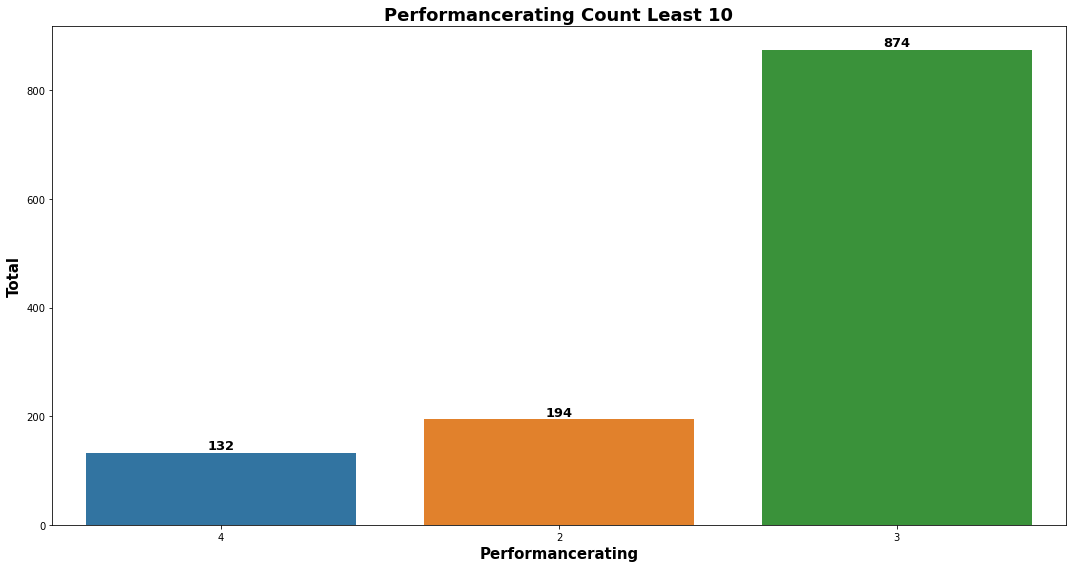

In [25]:
barplot_analysis(data_col_numeric[18])

## Gender

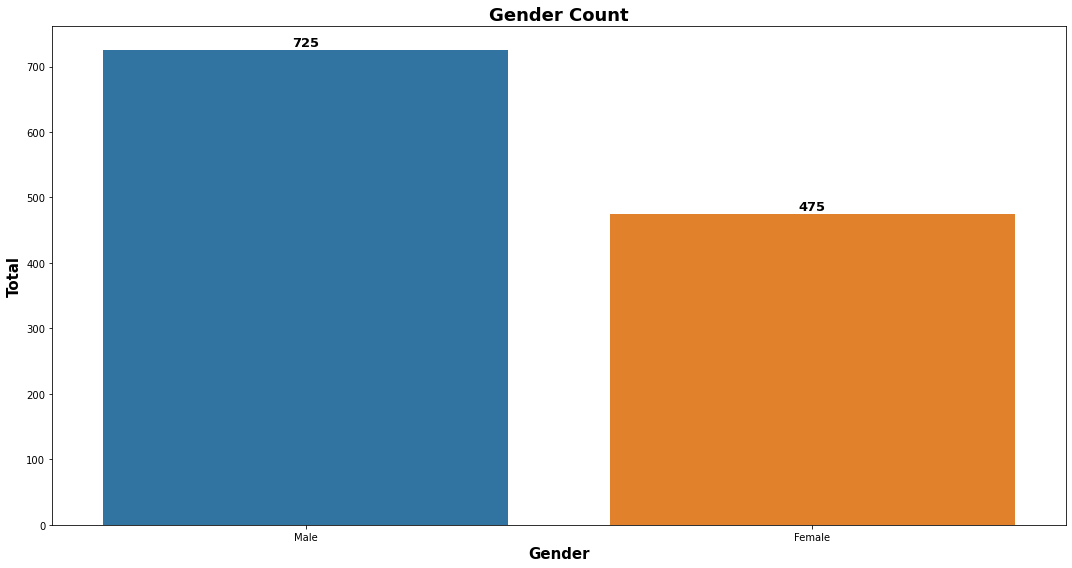

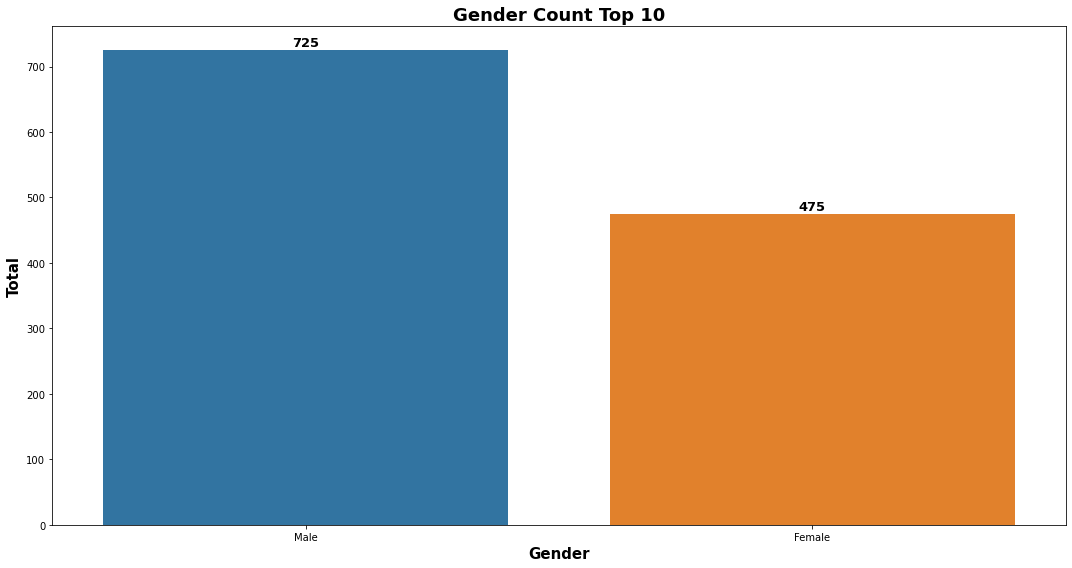

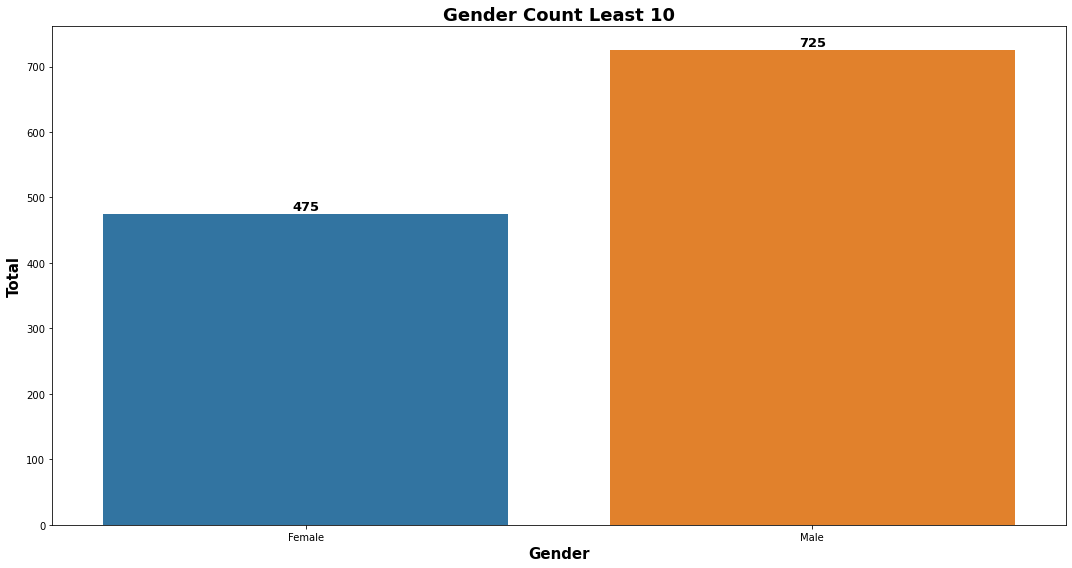

In [27]:
barplot_analysis(data_col_category[1])

## Educationbackground

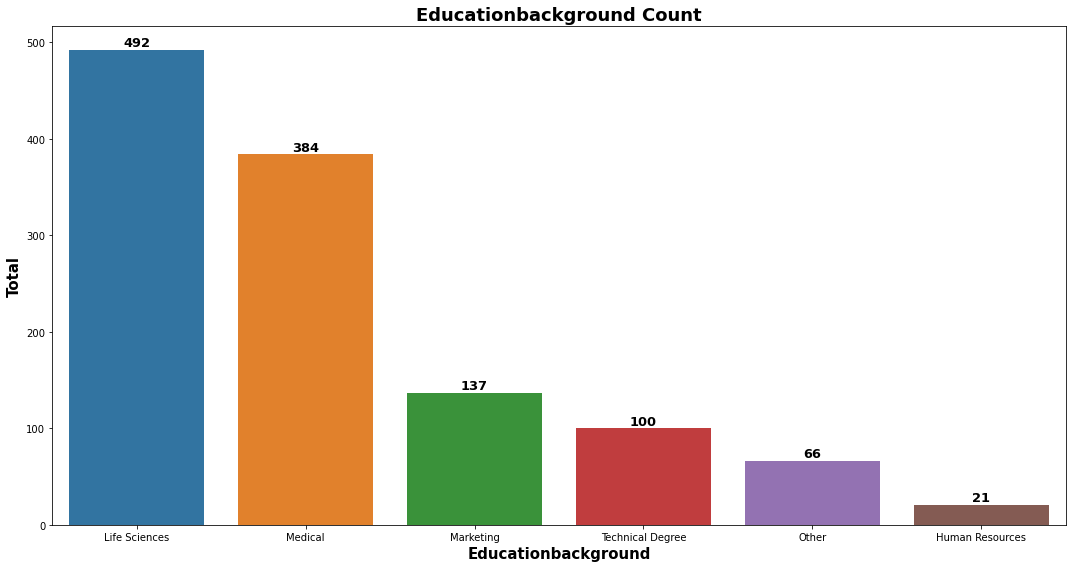

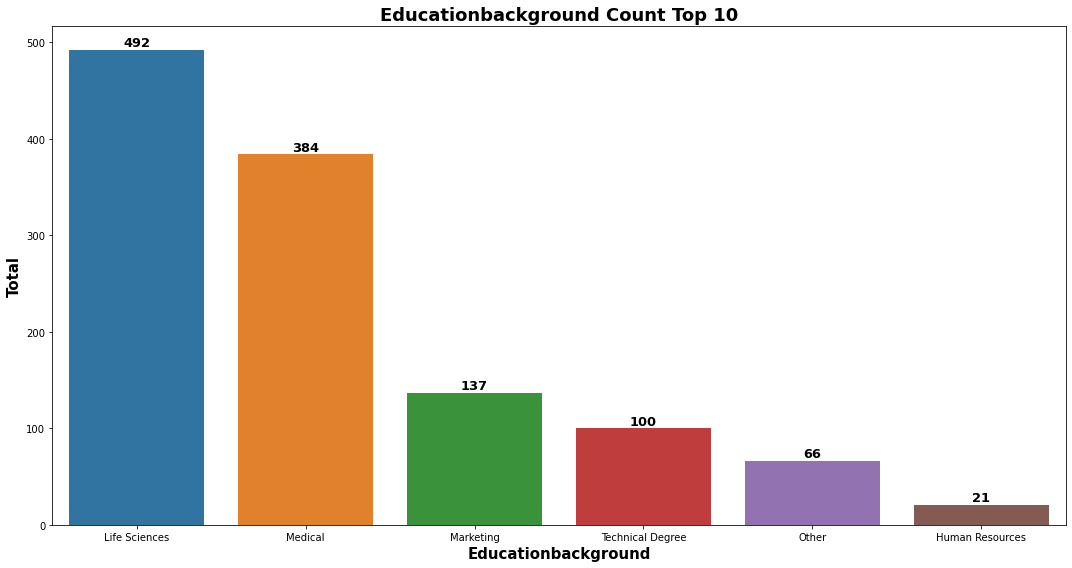

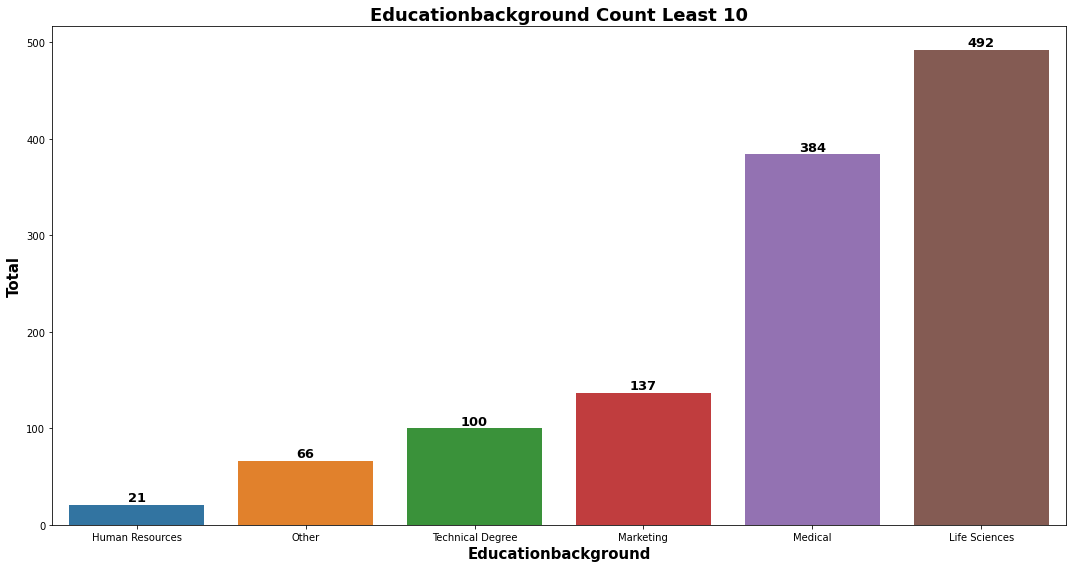

In [28]:
barplot_analysis(data_col_category[2])

## Maritalstatus

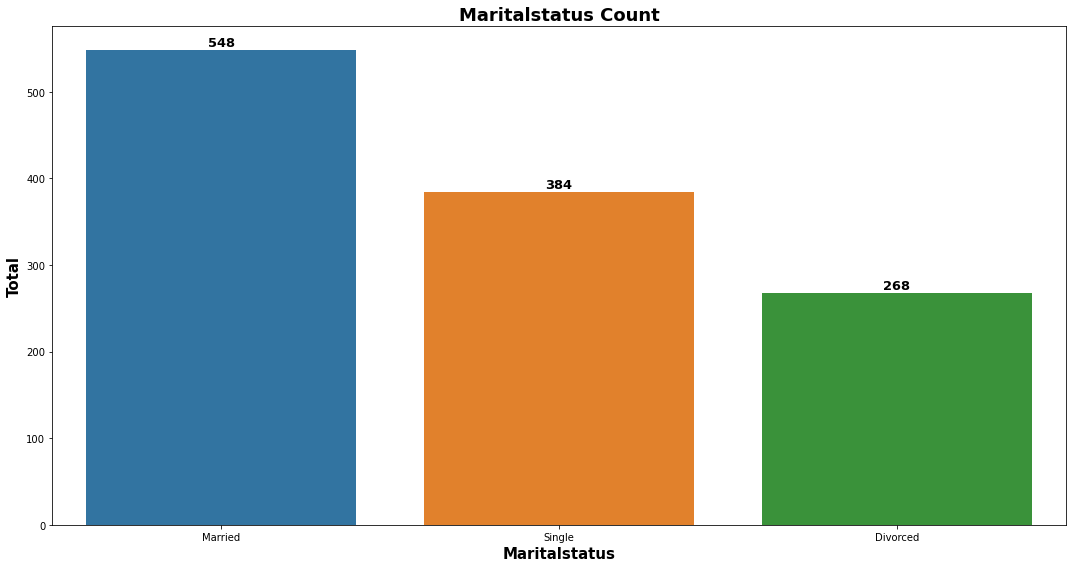

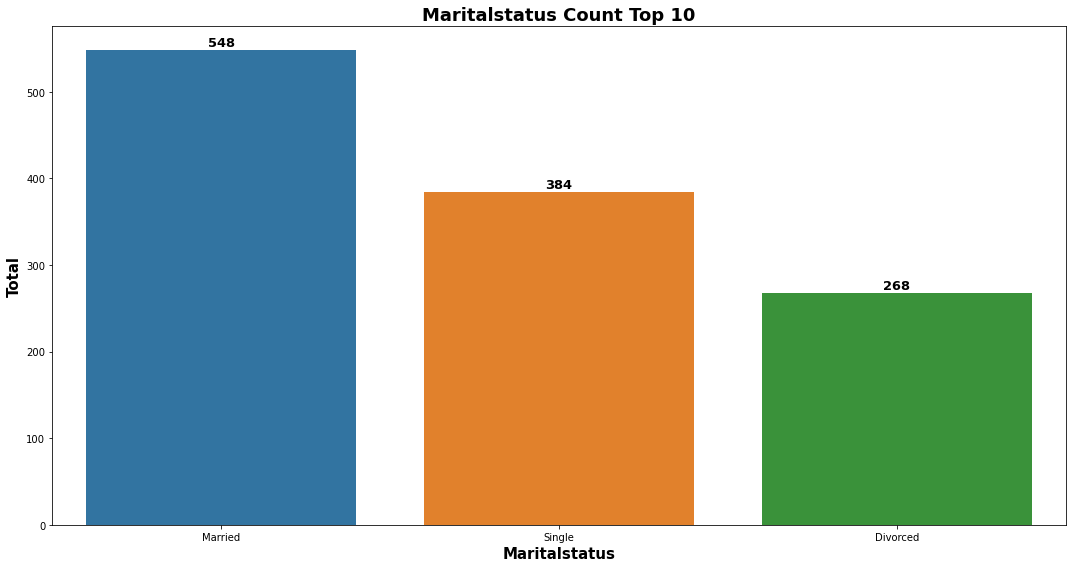

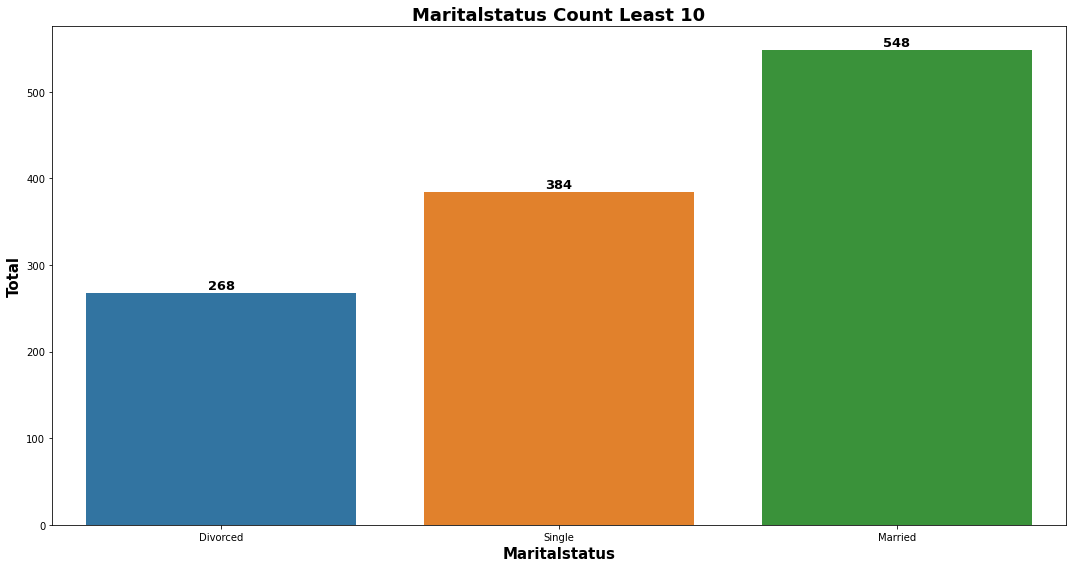

In [29]:
barplot_analysis(data_col_category[3])

## Empdepartment

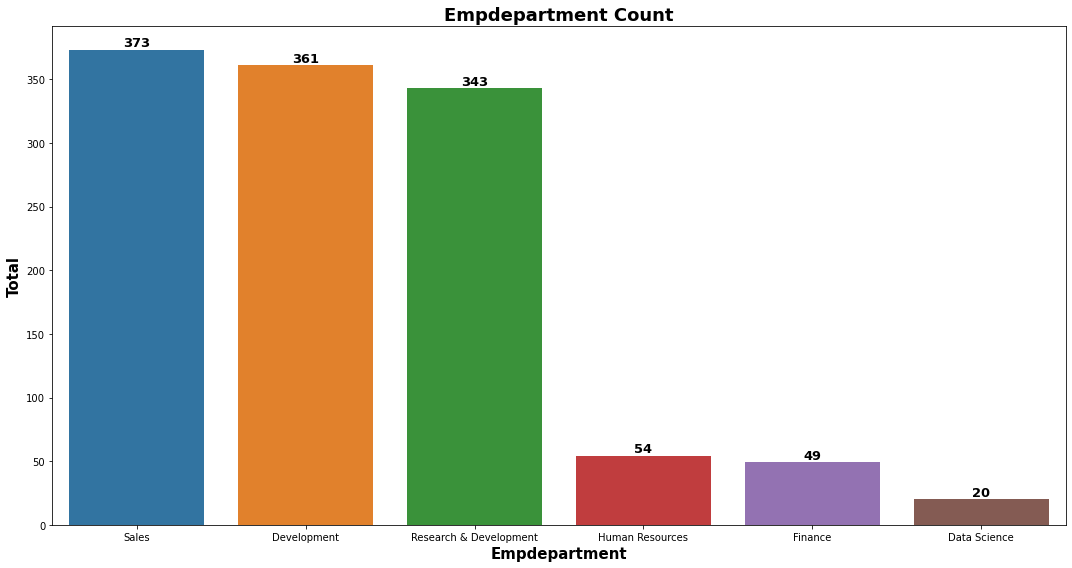

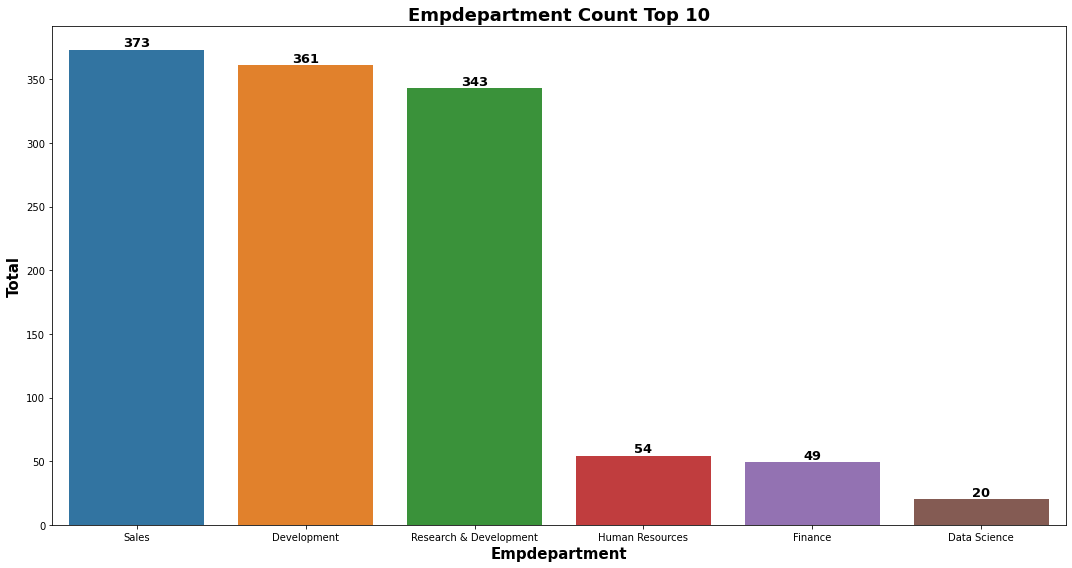

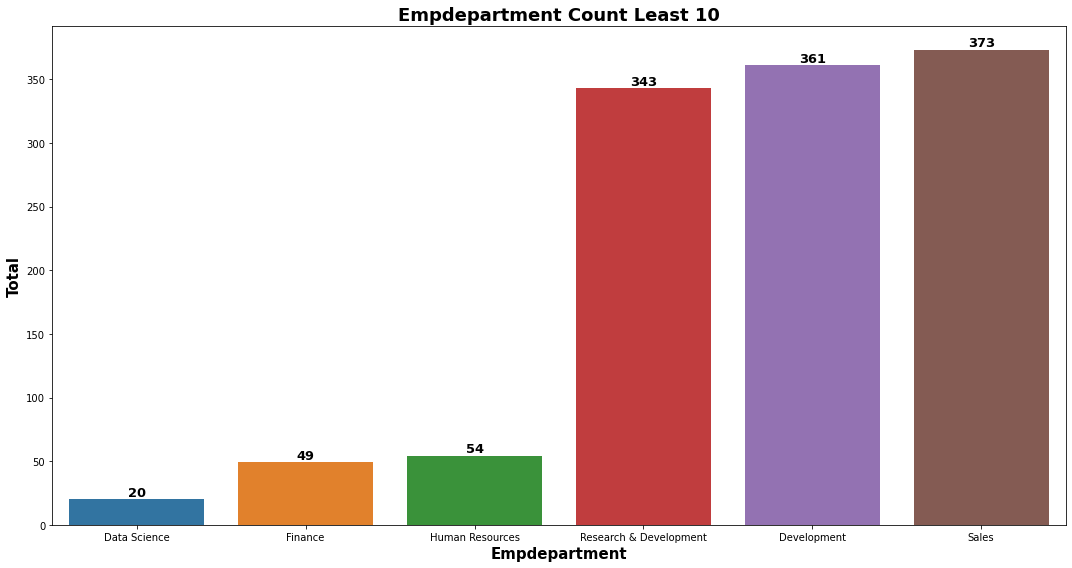

In [30]:
barplot_analysis(data_col_category[4])

## Empjobrole

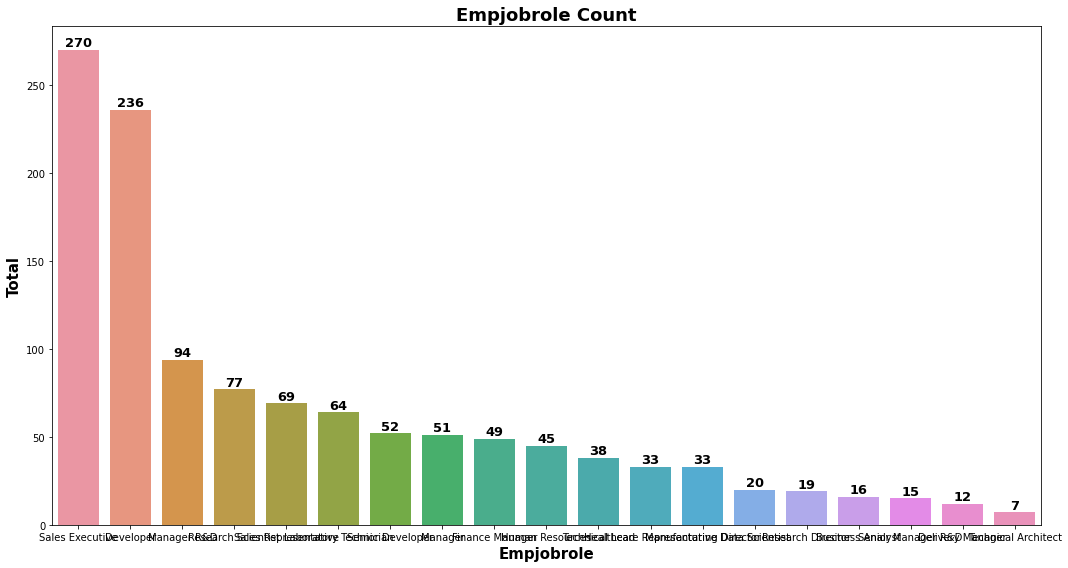

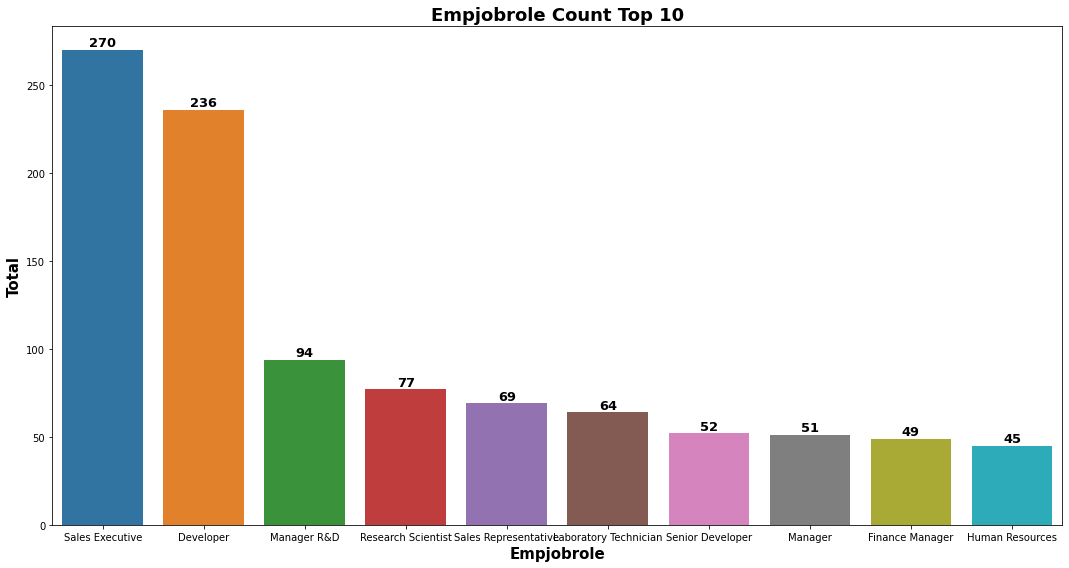

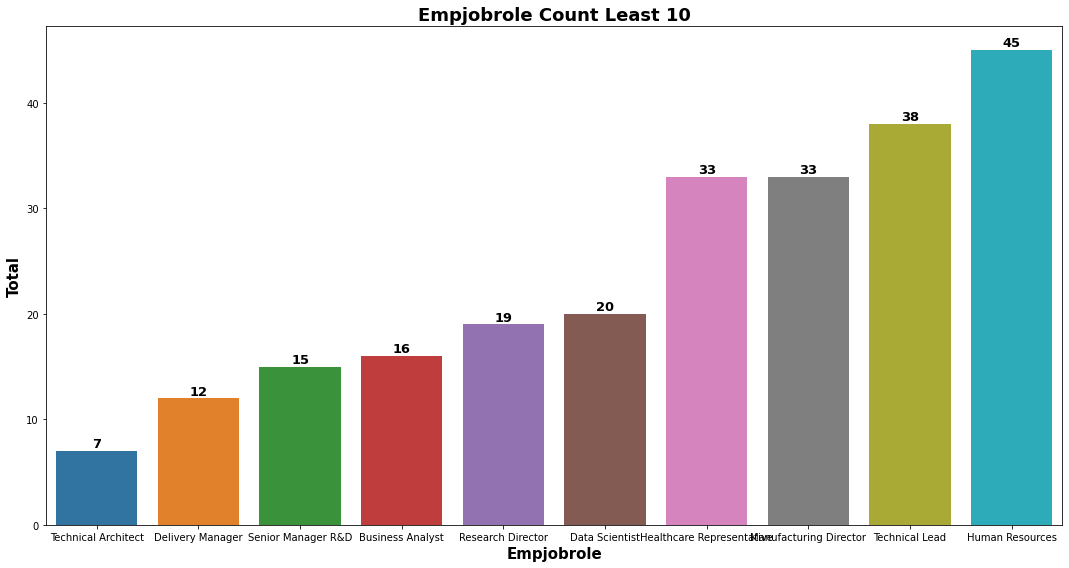

In [31]:
barplot_analysis(data_col_category[5])

## Businesstravelfrequency

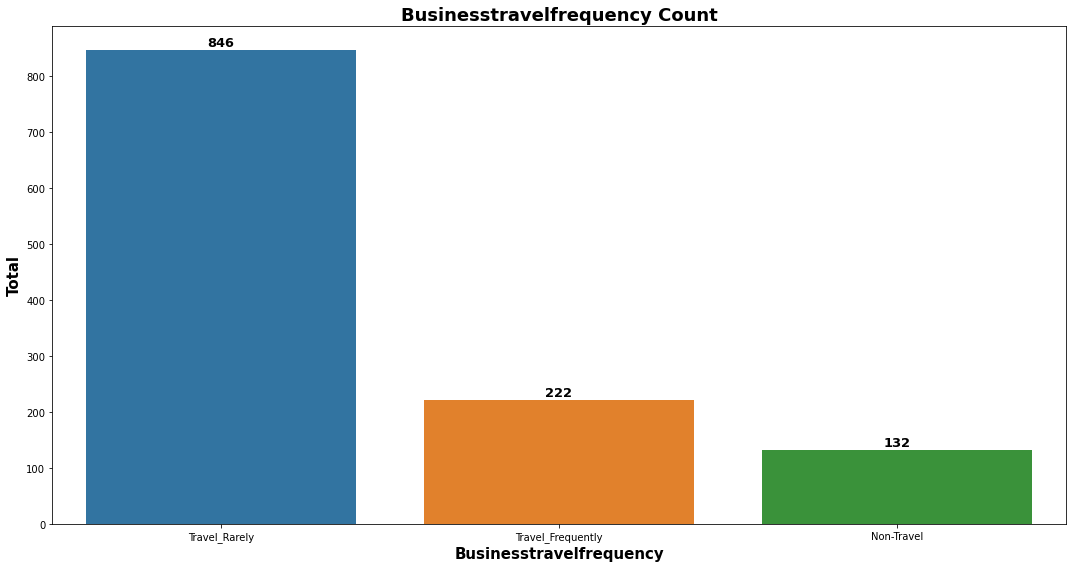

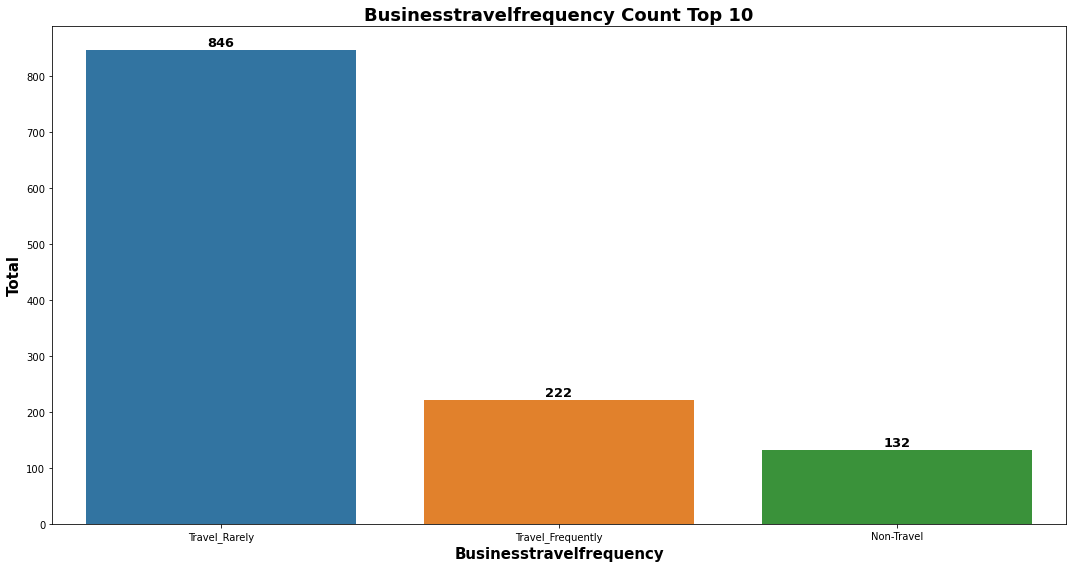

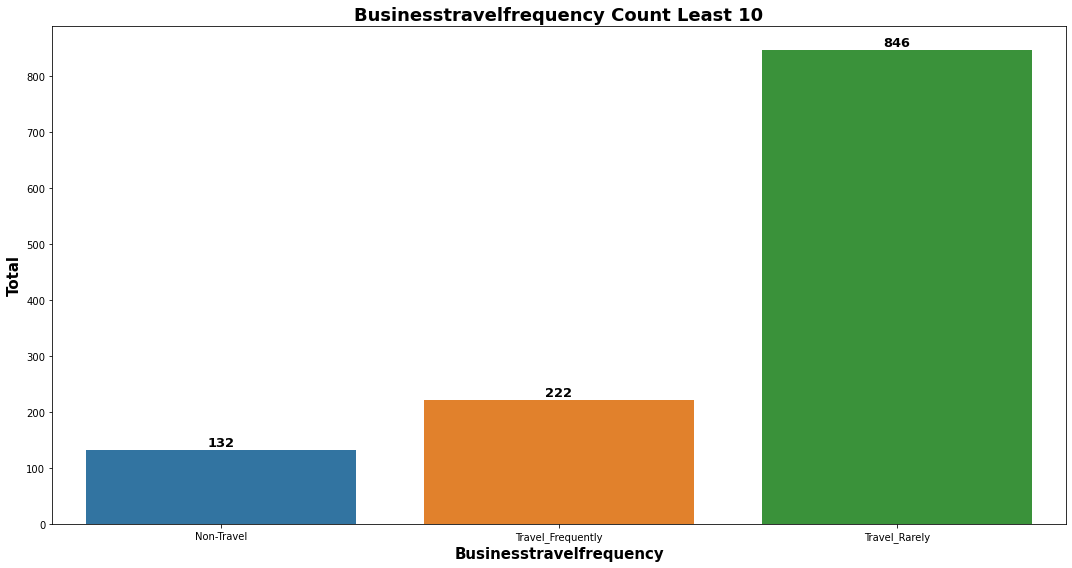

In [32]:
barplot_analysis(data_col_category[6])

## Overtime

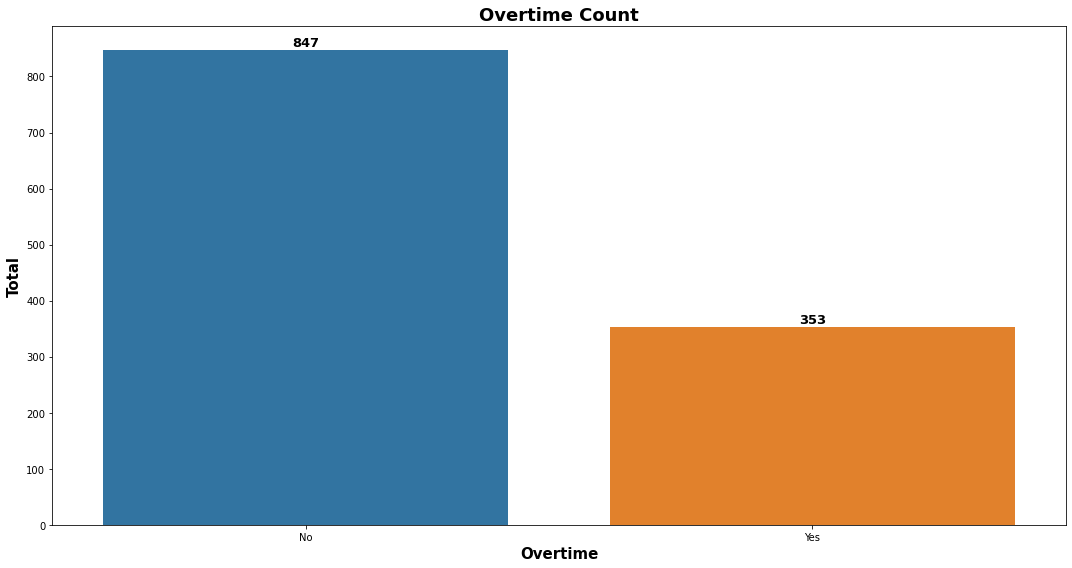

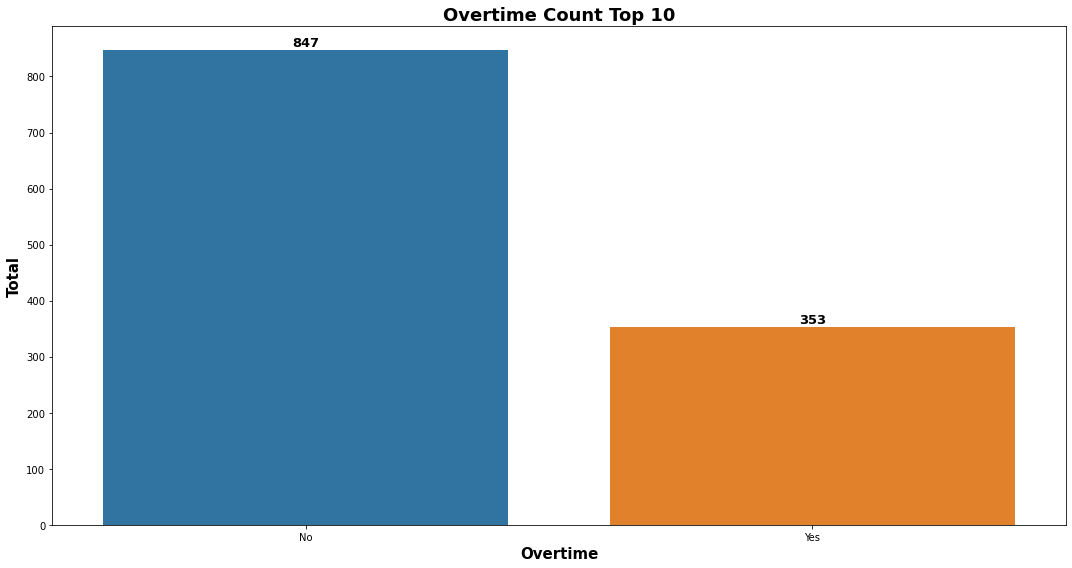

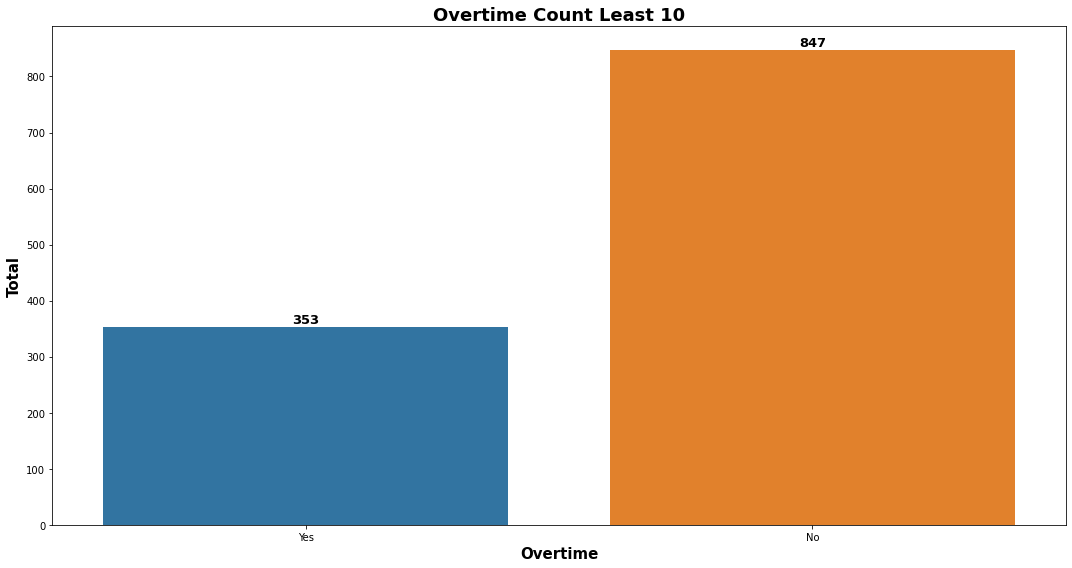

In [33]:
barplot_analysis(data_col_category[7])

## Attrition

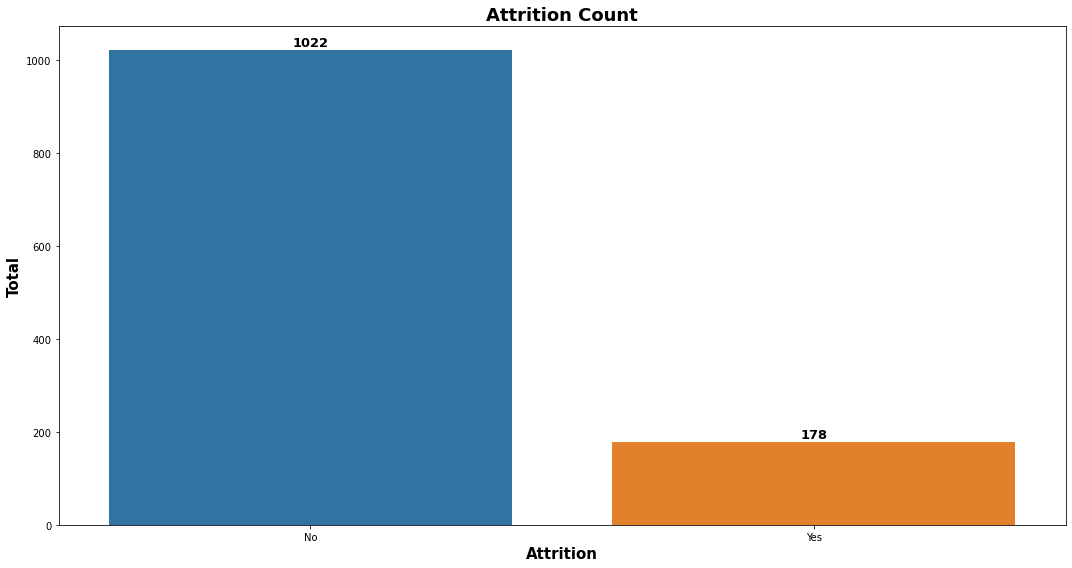

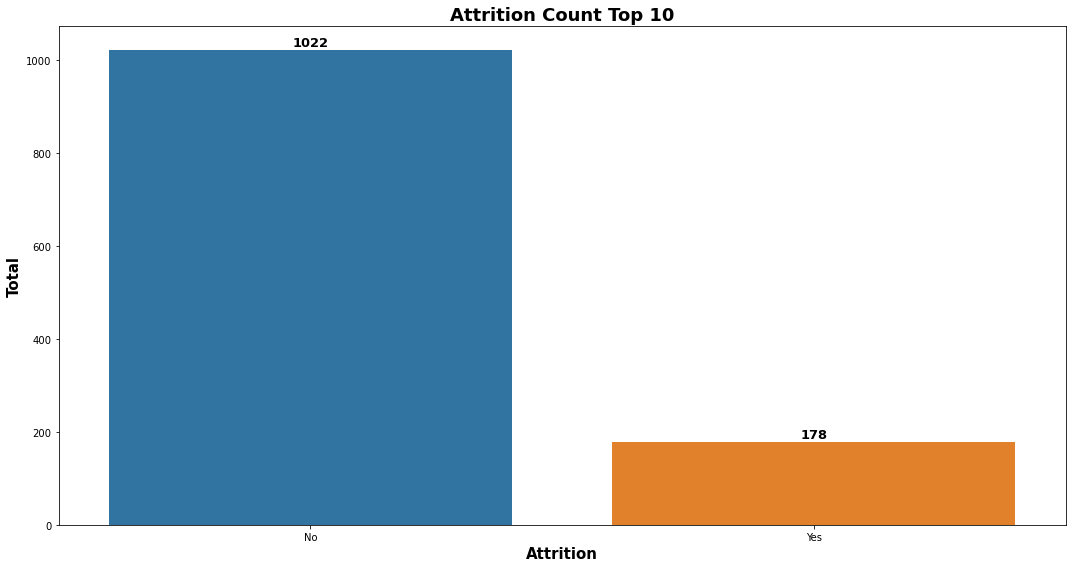

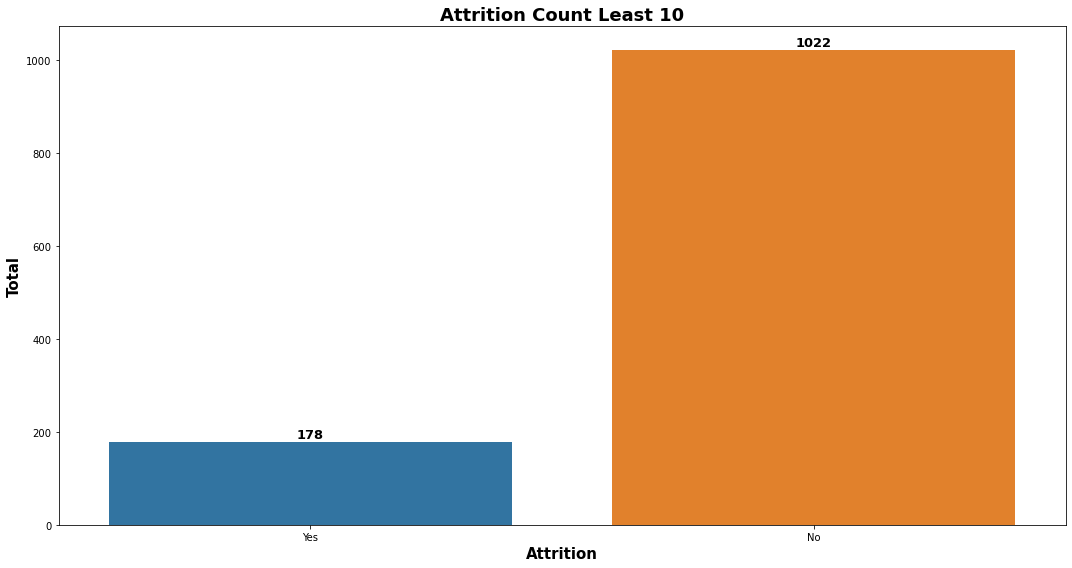

In [34]:
barplot_analysis(data_col_category[8])

# Advance Visualization using Tableau

## Wise Department Dashboard

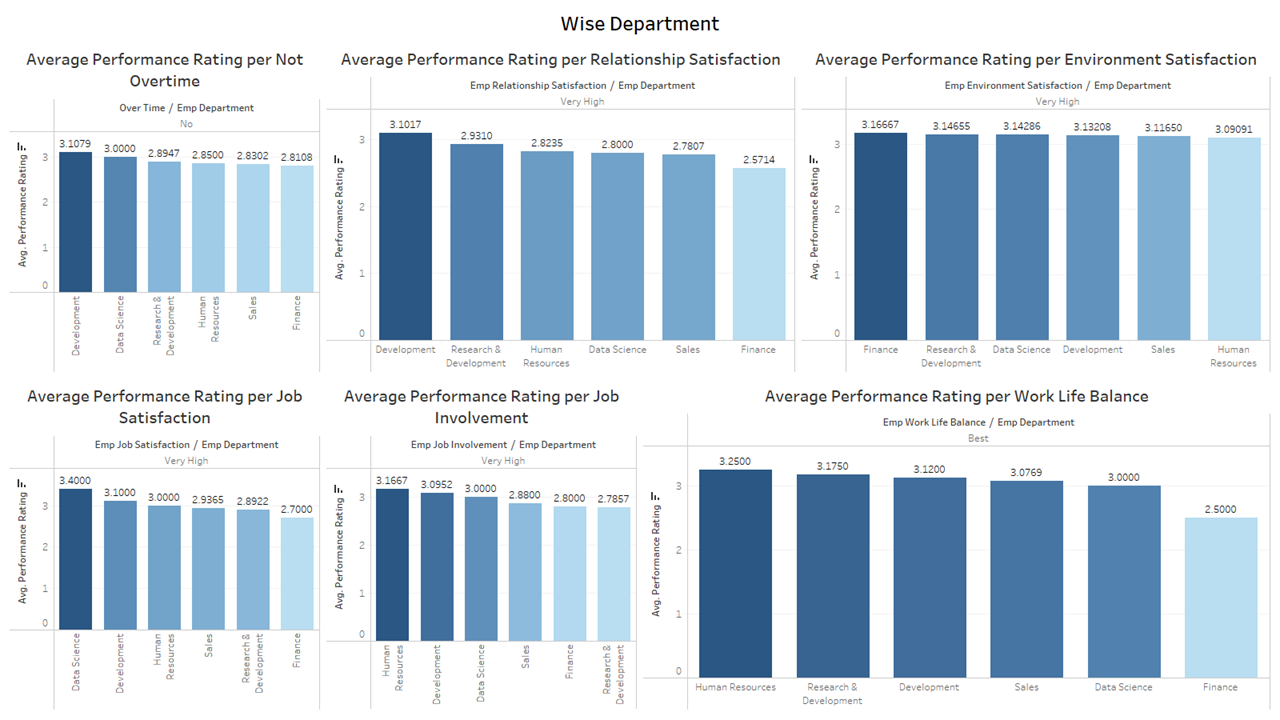

## Recommendation Dashboard

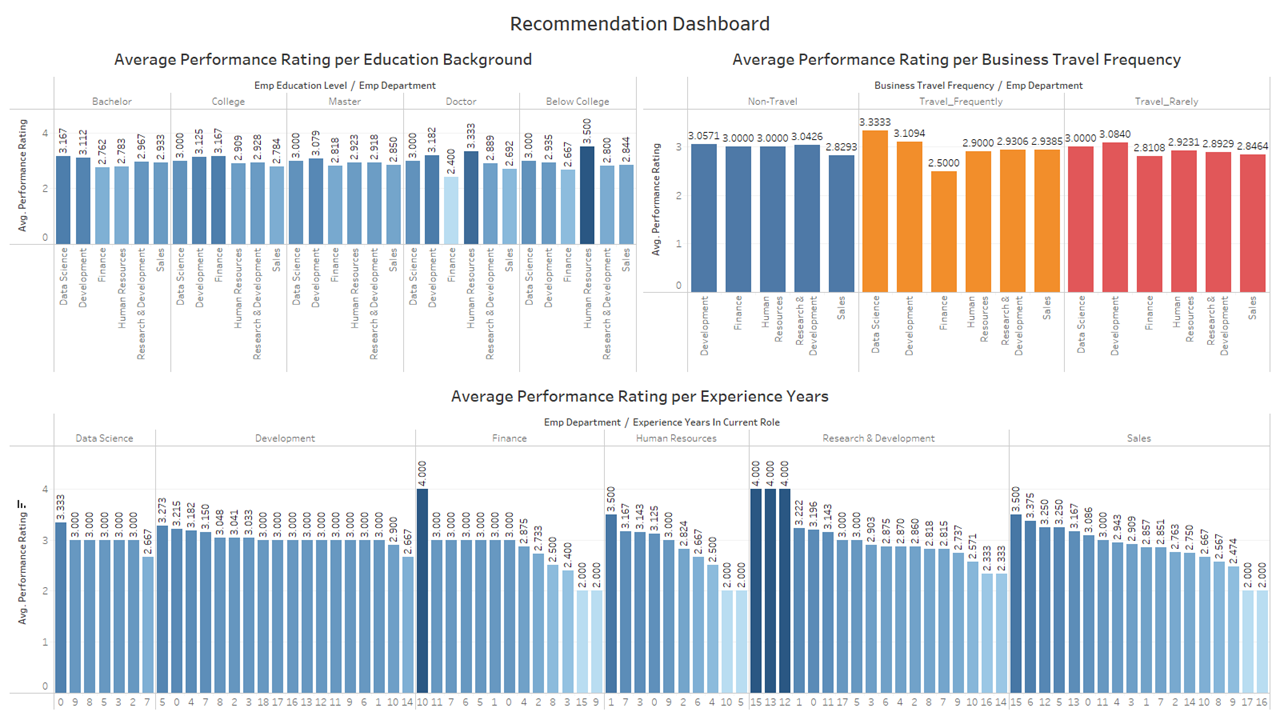